# **PRIMERA PARTE: ANÁLISIS CUANTITATIVO.**

In [98]:
#Librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import os
from shapely.geometry import Point

import requests
import zipfile
import io

# Datafiles URLs
url_greentd_202312 = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-12.parquet"
url_greentd_202311 = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-11.parquet"
url_yellowtd_202312 = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-12.parquet"
url_yellowtd_202311 = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-11.parquet"
url_nyc_zones = "https://data.cityofnewyork.us/api/views/755u-8jsi/rows.csv?accessType=DOWNLOAD"
url_taxi_zone_lu = "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv"
url_taxi_zones_zip = "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zones.zip"

# Download data files
df_Green_Trip_December = pd.read_parquet(url_greentd_202312, engine='pyarrow')
df_Green_Trip_November = pd.read_parquet(url_greentd_202311, engine='pyarrow')
df_Yellow_Trip_December = pd.read_parquet(url_yellowtd_202312, engine='pyarrow')
df_Yellow_Trip_November = pd.read_parquet(url_yellowtd_202311, engine='pyarrow')
df_map_taxi_lookup = pd.read_csv(url_taxi_zone_lu, delimiter=',')
df_nyc_zones = pd.read_csv(url_nyc_zones)

# Download taxi shape files
rq = requests.get(url_taxi_zones_zip)

# Unzip shape files
taxi_zones_path = os.path.abspath("./data/taxi_zones") 
z = zipfile.ZipFile(io.BytesIO(rq.content))
z.extractall(taxi_zones_path)

# Load shape file
df_taxi_zone_shp = gpd.read_file(f"{taxi_zones_path}/taxi_zones.shp")

# Inspect shape files and taxi zones samples
print(df_taxi_zone_shp.shape)
print(df_taxi_zone_shp.head(10))

print(df_nyc_zones.shape)
print(df_nyc_zones.head(10))

# Join shape file and taxi zones files since geometry in shapefile is not lat-lon.
df_taxi_shapes = df_taxi_zone_shp.set_index('LocationID').join(
                    other=df_nyc_zones.set_index('LocationID'), on='LocationID', 
                    how='inner', lsuffix='_shp', rsuffix='_zones'
                ).join(
                    other=df_map_taxi_lookup.set_index('LocationID'), on='LocationID',
                    how='right', rsuffix='_lut'
                )               

print(df_taxi_shapes.shape)
print(df_taxi_shapes.columns)

(263, 7)
   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   
5         6    0.150491    0.000606  Arrochar/Fort Wadsworth           6   
6         7    0.107417    0.000390                  Astoria           7   
7         8    0.027591    0.000027             Astoria Park           8   
8         9    0.099784    0.000338               Auburndale           9   
9        10    0.099839    0.000436             Baisley Park          10   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Quee

In [99]:
df_taxi_shapes.dropna(inplace=True)
df_taxi_shapes

,LocationID,OBJECTID_shp,Shape_Leng_shp,Shape_Area_shp,zone_shp,borough_shp,geometry,OBJECTID_zones,Shape_Leng_zones,the_geom,Shape_Area_zones,zone_zones,borough_zones,Borough,Zone,service_zone
1.0,1,1.0,0.116357,0.000782,Newark Airport,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,EWR,EWR,Newark Airport,EWR
2.0,2,2.0,0.433470,0.004866,Jamaica Bay,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Jamaica Bay,Queens,Queens,Jamaica Bay,Boro Zone
3.0,3,3.0,0.084341,0.000314,Allerton/Pelham Gardens,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ...",3.0,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Allerton/Pelham Gardens,Bronx,Bronx,Allerton/Pelham Gardens,Boro Zone
4.0,4,4.0,0.043567,0.000112,Alphabet City,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Alphabet City,Manhattan,Manhattan,Alphabet City,Yellow Zone
5.0,5,5.0,0.092146,0.000498,Arden Heights,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14...",5.0,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Arden Heights,Staten Island,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259.0,259,259.0,0.126750,0.000395,Woodlawn/Wakefield,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",259.0,0.126750,MULTIPOLYGON (((-73.85107116191898 40.91037152...,0.000395,Woodlawn/Wakefield,Bronx,Bronx,Woodlawn/Wakefield,Boro Zone
260.0,260,260.0,0.133514,0.000422,Woodside,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",260.0,0.133514,MULTIPOLYGON (((-73.90175373399988 40.76077547...,0.000422,Woodside,Queens,Queens,Woodside,Boro Zone
261.0,261,261.0,0.027120,0.000034,World Trade Center,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",261.0,0.027120,MULTIPOLYGON (((-74.01332610899988 40.70503078...,0.000034,World Trade Center,Manhattan,Manhattan,World Trade Center,Yellow Zone
262.0,262,262.0,0.049064,0.000122,Yorkville East,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",262.0,0.049064,MULTIPOLYGON (((-73.94383256699986 40.78285908...,0.000122,Yorkville East,Manhattan,Manhattan,Yorkville East,Yellow Zone


## Ajustamos las columnas del dataset de shapes definitivo


In [100]:
print(df_taxi_shapes.columns)
columns_to_remove = [
    'OBJECTID_shp', 'Shape_Leng_shp', 'Shape_Area_shp', 'zone_shp', 'borough_shp', 'geometry',
    'OBJECTID_zones', 'borough_zones', 'zone_zones'
]
columns_to_rename = {
    'Shape_Leng_zones': 'Shape_Leng',
    'Shape_Area_zones': 'Shape_Area',
    'the_geom': 'geometry'
}
df_taxi_shapes.drop(columns=columns_to_remove, inplace=True)
df_taxi_shapes.rename(columns=columns_to_rename, inplace=True)
df_taxi_shapes.columns = df_taxi_shapes.columns.str.lower()

Index(['LocationID', 'OBJECTID_shp', 'Shape_Leng_shp', 'Shape_Area_shp',
       'zone_shp', 'borough_shp', 'geometry', 'OBJECTID_zones',
       'Shape_Leng_zones', 'the_geom', 'Shape_Area_zones', 'zone_zones',
       'borough_zones', 'Borough', 'Zone', 'service_zone'],
      dtype='object')


## Visualizamos los datasets

In [104]:
df_taxi_shapes.rename(columns={'locationid': 'LocationID'}, inplace=True)
df_taxi_shapes.set_index('LocationID', inplace=True)

KeyError: "None of ['LocationID'] are in the columns"

In [105]:
df_taxi_shapes

,shape_leng,geometry,shape_area,borough,zone,service_zone
LocationID,,,,,,
1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,EWR,Newark Airport,EWR
2,0.433470,MULTIPOLYGON (((-73.82337597260663 40.63898704...,0.004866,Queens,Jamaica Bay,Boro Zone
3,0.084341,MULTIPOLYGON (((-73.84792614099985 40.87134223...,0.000314,Bronx,Allerton/Pelham Gardens,Boro Zone
4,0.043567,MULTIPOLYGON (((-73.97177410965318 40.72582128...,0.000112,Manhattan,Alphabet City,Yellow Zone
5,0.092146,MULTIPOLYGON (((-74.17421738099989 40.56256808...,0.000498,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...,...,...
259,0.126750,MULTIPOLYGON (((-73.85107116191898 40.91037152...,0.000395,Bronx,Woodlawn/Wakefield,Boro Zone
260,0.133514,MULTIPOLYGON (((-73.90175373399988 40.76077547...,0.000422,Queens,Woodside,Boro Zone
261,0.027120,MULTIPOLYGON (((-74.01332610899988 40.70503078...,0.000034,Manhattan,World Trade Center,Yellow Zone


In [106]:
df_Green_Trip_December

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-12-01 00:27:37,2023-12-01 00:42:48,N,1.0,74,243,1.0,4.80,22.60,1.0,0.5,5.02,0.00,NaN,1.0,30.12,1.0,1.0,0.0
1,1,2023-12-01 00:42:57,2023-12-01 00:56:16,N,1.0,80,25,2.0,3.60,19.10,1.0,1.5,4.30,0.00,NaN,1.0,25.90,1.0,1.0,0.0
2,2,2023-12-01 00:29:51,2023-12-01 00:49:38,N,1.0,70,83,1.0,2.07,18.40,1.0,0.5,0.00,0.00,NaN,1.0,20.90,2.0,1.0,0.0
3,2,2023-12-01 00:09:57,2023-12-01 00:36:51,N,1.0,112,106,1.0,8.66,38.70,1.0,0.5,8.24,0.00,NaN,1.0,49.44,1.0,1.0,0.0
4,2,2023-12-01 01:02:41,2023-12-01 01:11:20,N,1.0,129,179,1.0,2.74,14.20,1.0,0.5,0.00,0.00,NaN,1.0,16.70,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64210,2,2023-12-31 22:15:00,2023-12-31 22:35:00,None,NaN,97,37,NaN,9.87,20.28,0.0,0.0,4.26,0.00,NaN,1.0,25.54,NaN,NaN,NaN
64211,2,2023-12-31 23:17:00,2023-12-31 23:53:00,None,NaN,116,37,NaN,12.07,55.38,0.0,0.0,12.66,6.94,NaN,1.0,75.98,NaN,NaN,NaN
64212,2,2023-12-31 23:21:00,2023-12-31 23:33:00,None,NaN,65,80,NaN,3.84,16.93,0.0,0.0,3.59,0.00,NaN,1.0,21.52,NaN,NaN,NaN
64213,2,2023-12-31 23:15:00,2023-12-31 23:40:00,None,NaN,36,65,NaN,6.18,30.01,0.0,0.0,6.20,0.00,NaN,1.0,37.21,NaN,NaN,NaN


In [107]:
df_Yellow_Trip_December

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-12-01 00:06:06,2023-12-01 00:15:47,0.0,1.10,1.0,N,230,48,1,10.00,3.5,0.5,1.50,0.0,1.0,16.50,2.5,0.0
1,1,2023-12-01 00:22:26,2023-12-01 00:28:53,0.0,1.50,1.0,N,142,238,1,9.30,3.5,0.5,2.85,0.0,1.0,17.15,2.5,0.0
2,1,2023-12-01 00:59:44,2023-12-01 01:13:22,2.0,2.20,1.0,N,114,186,1,13.50,3.5,0.5,3.00,0.0,1.0,21.50,2.5,0.0
3,2,2023-12-01 00:22:17,2023-12-01 00:30:59,1.0,0.66,1.0,N,79,79,2,7.20,1.0,0.5,0.00,0.0,1.0,12.20,2.5,0.0
4,2,2023-12-01 00:18:16,2023-12-01 00:25:32,2.0,2.20,1.0,N,229,263,1,11.40,1.0,0.5,2.00,0.0,1.0,18.40,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3376562,2,2023-12-31 23:04:34,2023-12-31 23:13:58,NaN,1.34,NaN,None,233,163,0,12.08,0.0,0.5,0.00,0.0,1.0,16.08,NaN,NaN
3376563,2,2023-12-31 23:08:15,2023-12-31 23:08:23,NaN,0.00,NaN,None,48,48,0,25.98,0.0,0.5,0.00,0.0,1.0,27.48,NaN,NaN
3376564,2,2023-12-31 23:16:15,2023-12-31 23:30:28,NaN,3.71,NaN,None,196,198,0,16.68,0.0,0.5,0.00,0.0,1.0,18.18,NaN,NaN
3376565,2,2023-12-31 23:21:58,2023-12-31 23:34:29,NaN,5.20,NaN,None,140,148,0,19.64,0.0,0.5,0.00,0.0,1.0,23.64,NaN,NaN


In [6]:
df_map_taxi_lookup

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


## Validamos la distribución de los datos y los tipos de datos en cada dataset

In [108]:
#Tipos de Valores por Columna Green Trips
df_Green_Trip_December.dtypes

VendorID                          int32
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [8]:
#Tipos de Valores por Columna Yellow Trips
df_Yellow_Trip_December.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

In [109]:
#Validamos la distribución de los datos
df_Green_Trip_December['total_amount'].describe()

count    64215.000000
mean        24.261032
std         24.426750
min       -221.000000
25%         13.600000
50%         18.980000
75%         27.940000
max       1622.600000
Name: total_amount, dtype: float64

In [10]:
#Validamos la distribución de los datos
df_Yellow_Trip_December['total_amount'].describe()

count    3.376567e+06
mean     2.854158e+01
std      2.383694e+01
min     -1.094050e+03
25%      1.596000e+01
50%      2.140000e+01
75%      3.156000e+01
max      4.269160e+03
Name: total_amount, dtype: float64

## Verificamos si tienen las mismas columnas

In [110]:
dataframes = [df_Green_Trip_December, df_Green_Trip_November]

all([len(dataframes[0].columns.intersection(df.columns))
      == dataframes[0].shape[1] for df in dataframes])

if all([set(dataframes[0].columns) == set(df.columns) for df in dataframes]):
    print('Tienen las mismas columnas')
else:
    print('Algunas columnas son distintas')

Tienen las mismas columnas


## Identificamos cuántos datos NaN hay en el Dataset

In [117]:
#Cuantos NaN hay por columna en el dataset de Green Trip
nan_df_Green = df_Green_Trip_December.isna().sum()
print(nan_df_Green)

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4912
RatecodeID                4912
PULocationID                 0
DOLocationID                 0
passenger_count           4912
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                64215
improvement_surcharge        0
total_amount                 0
payment_type              4912
trip_type                 4914
congestion_surcharge      4912
dtype: int64


In [112]:
#Cuantos NaN hay por columna en el dataset de Yellow Trip
nan_df_Yellow = df_Yellow_Trip_December.isna().sum()
print(nan_df_Yellow)

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          180003
trip_distance                 0
RatecodeID               180003
store_and_fwd_flag       180003
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     180003
Airport_fee              180003
dtype: int64


## Validamos las columnas de cada Dataset

In [113]:
#Obtenmos los nombres de las columnas de ambos DataFrames
columnas_green = set(df_Green_Trip_December.columns)
columnas_yellow = set(df_Yellow_Trip_December.columns)

diff_green_not_in_yellow = columnas_green - columnas_yellow
diff_yellow_not_in_green = columnas_yellow - columnas_green

if diff_green_not_in_yellow or diff_yellow_not_in_green:
    print("Diferencias encontradas:")
    if diff_green_not_in_yellow:
        print("Columnas en Green pero no en Yellow:", diff_green_not_in_yellow)
    if diff_yellow_not_in_green:
        print("Columnas en Yellow pero no en Green:", diff_yellow_not_in_green)
else:
    print("Los DataFrames tienen las mismas columnas.")

Diferencias encontradas:
Columnas en Green pero no en Yellow: {'lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_type', 'ehail_fee'}
Columnas en Yellow pero no en Green: {'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'Airport_fee'}


## Ploteamos los datasets para visualizar los datos

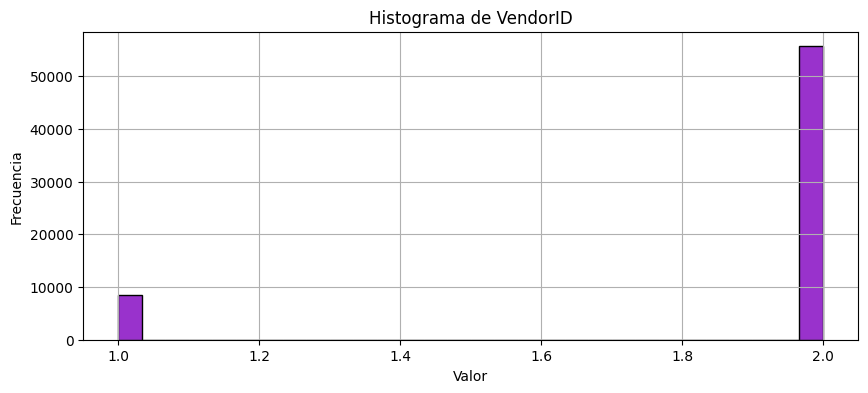

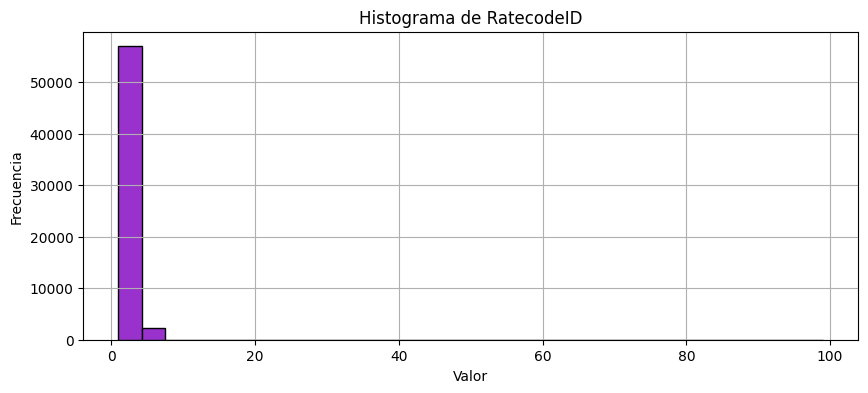

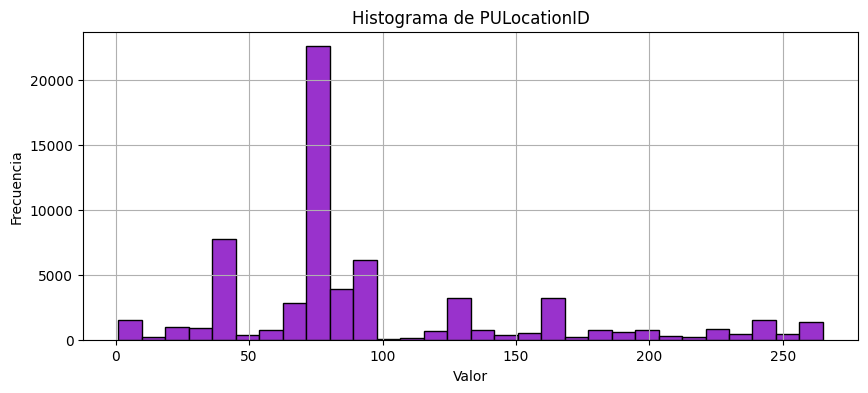

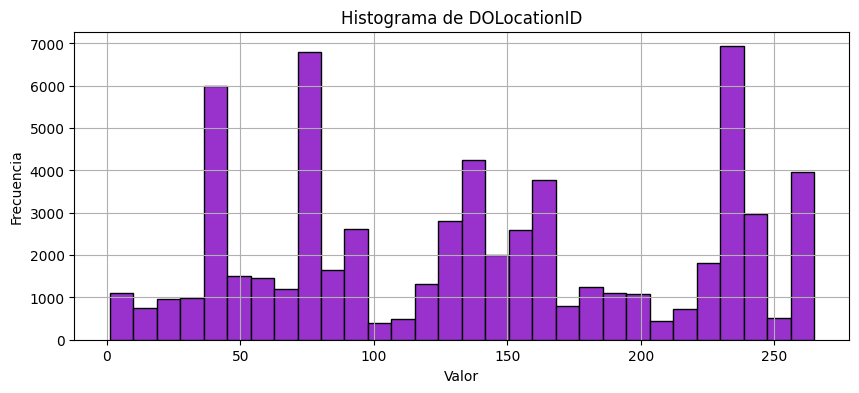

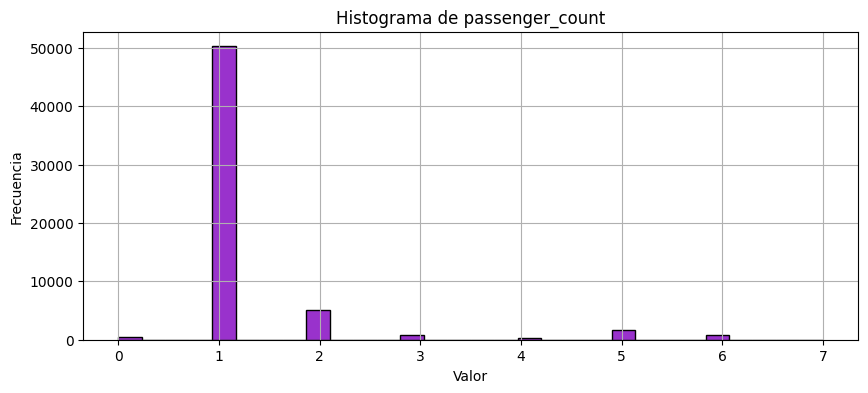

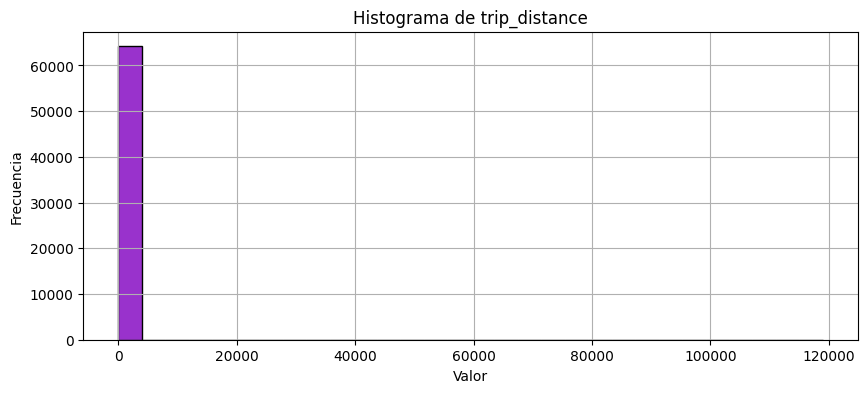

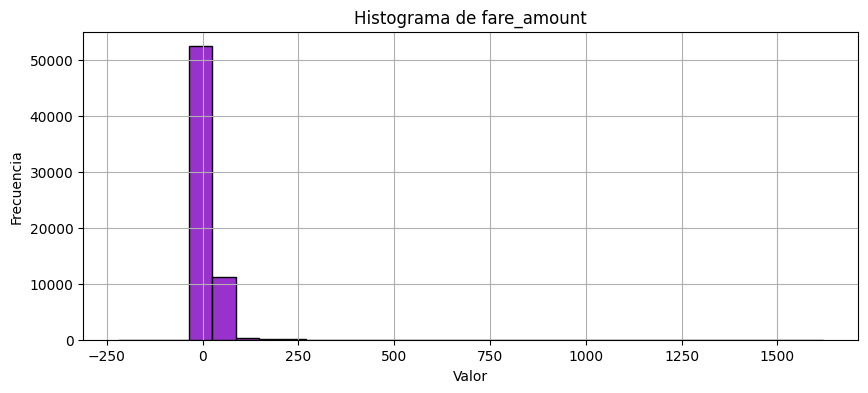

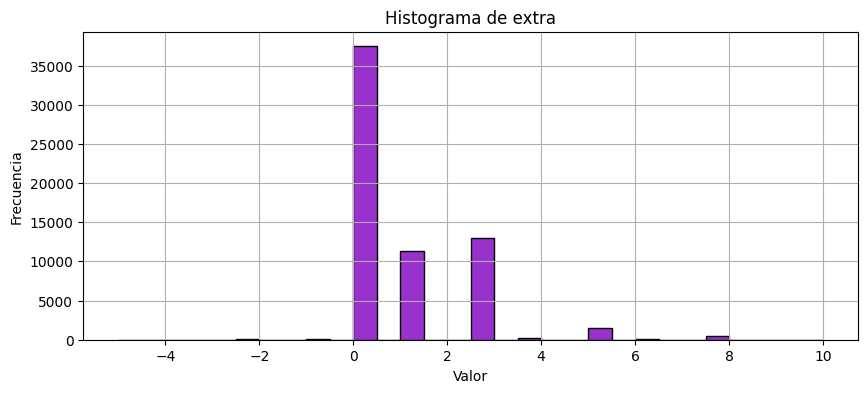

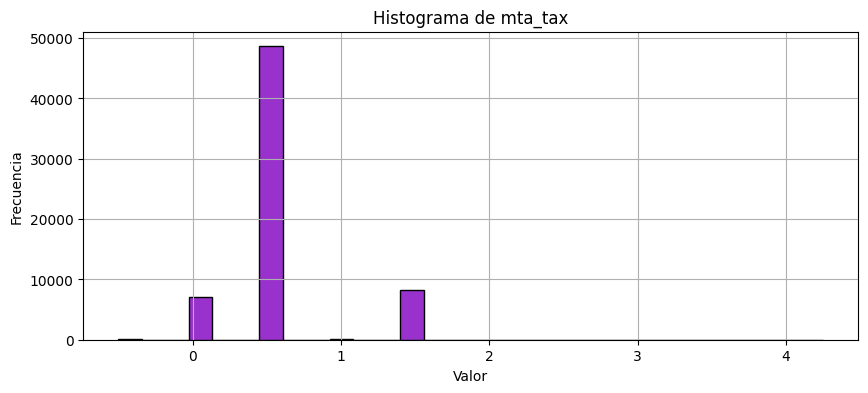

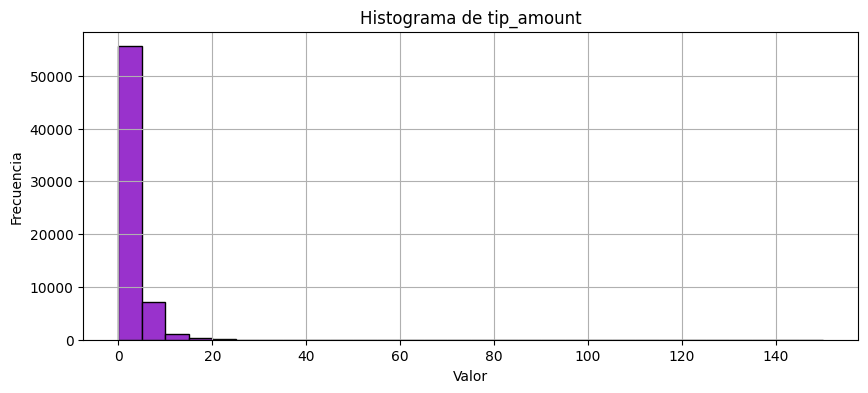

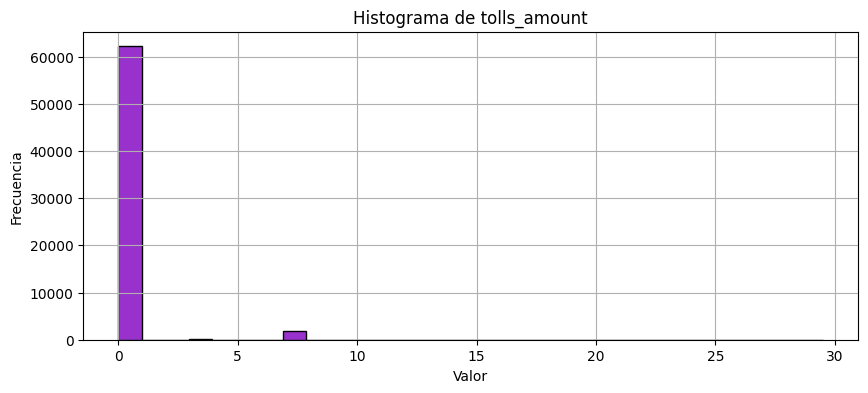

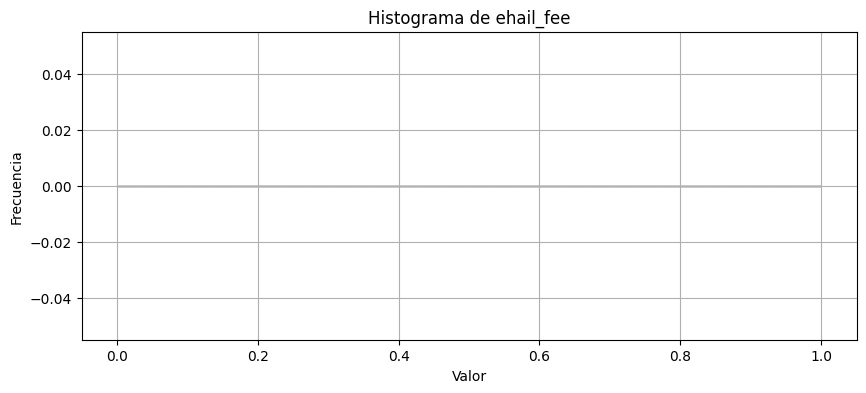

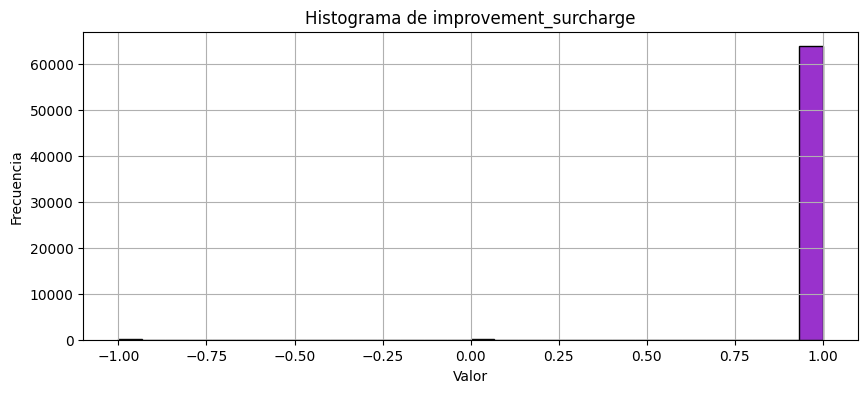

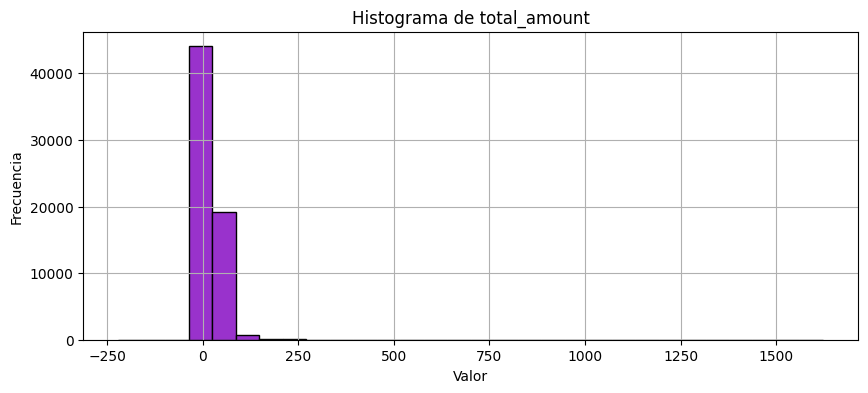

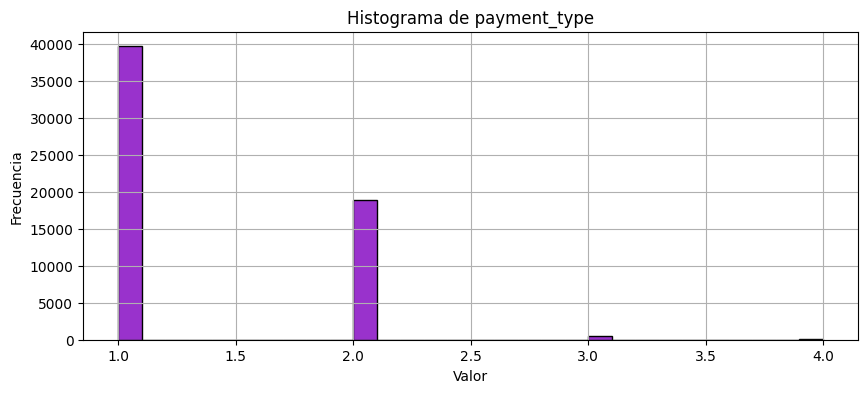

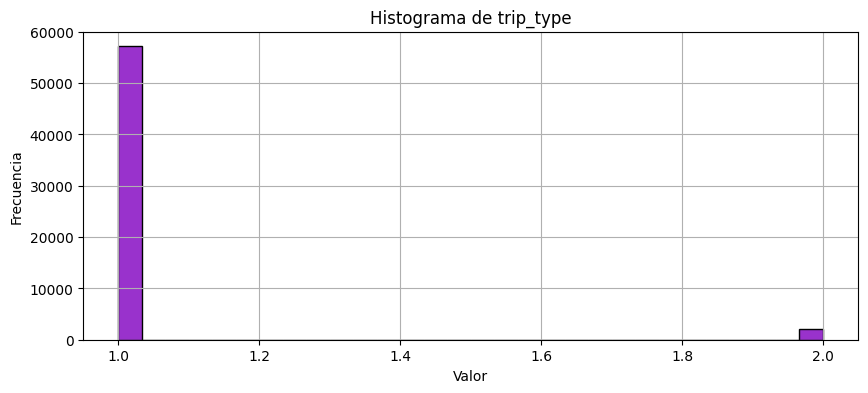

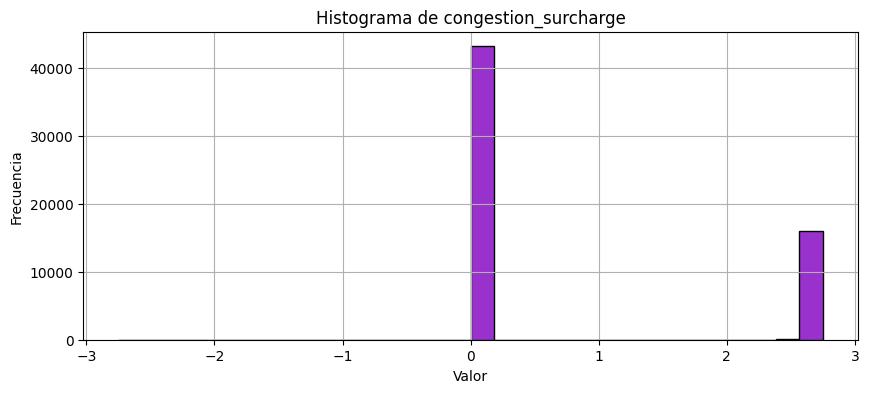

In [114]:
for column in df_Green_Trip_December.columns:
    if pd.api.types.is_numeric_dtype(df_Green_Trip_December[column]):
        plt.figure(figsize=(10, 4))
        plt.hist(df_Green_Trip_December[column].dropna(), bins=30, edgecolor='black', color='darkorchid')
        plt.title(f'Histograma de {column}')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()

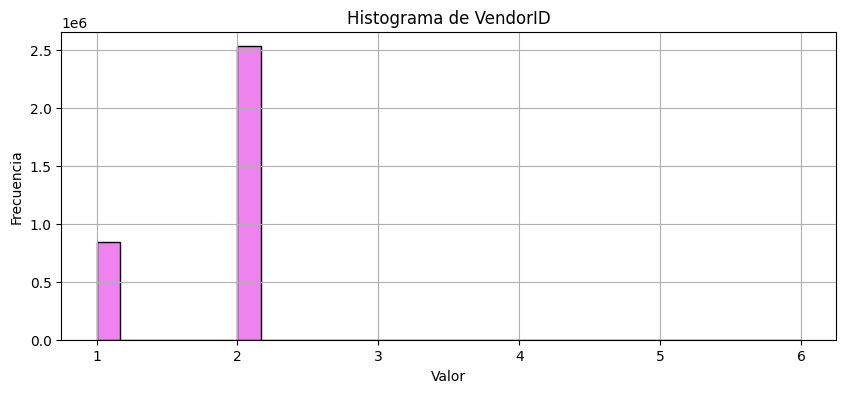

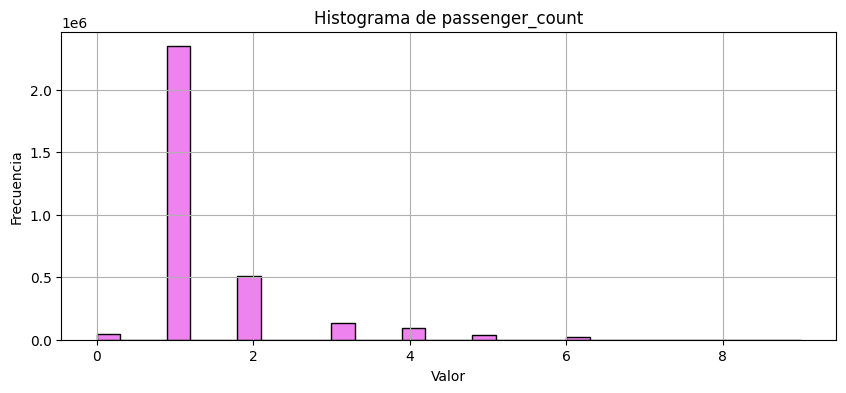

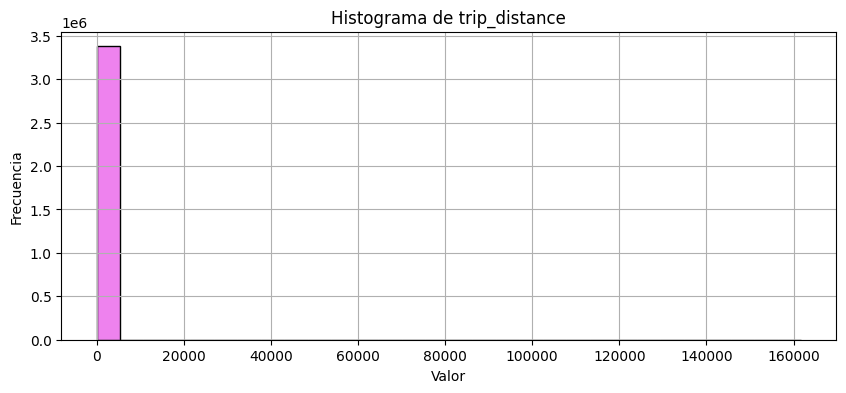

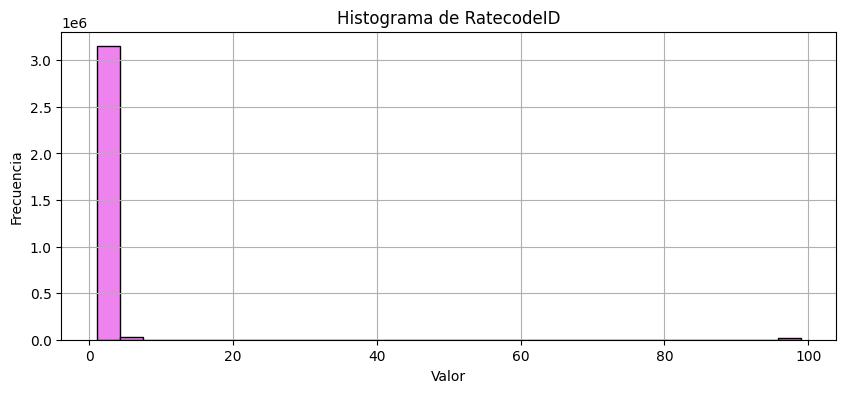

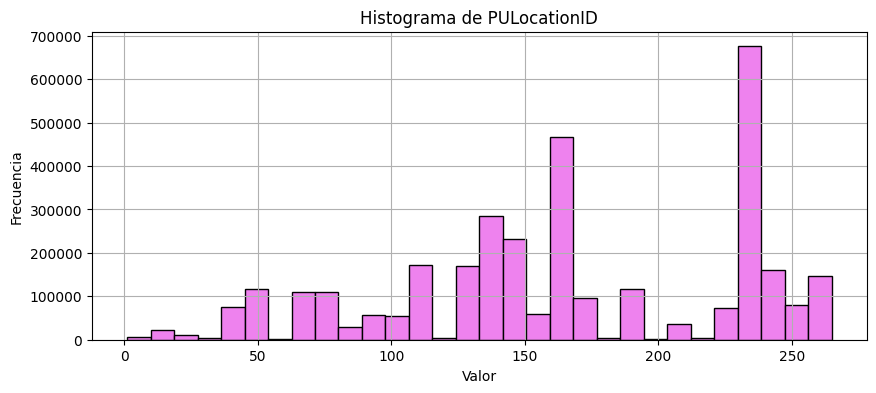

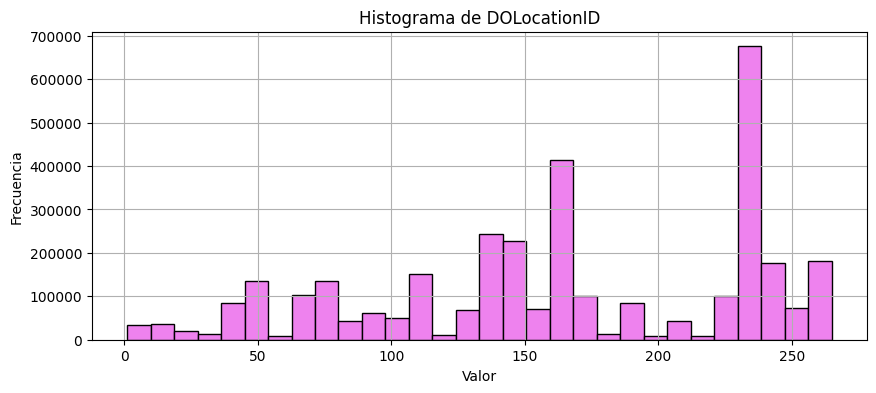

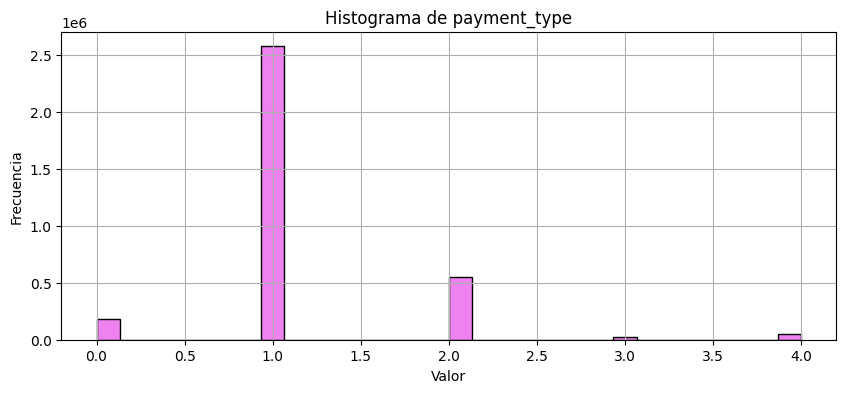

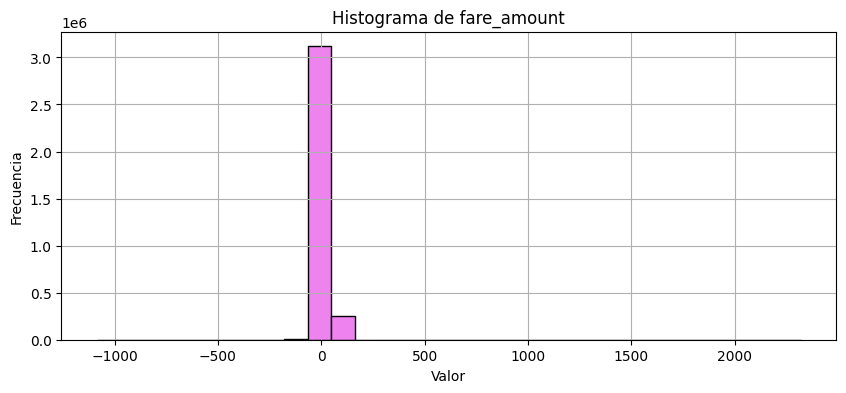

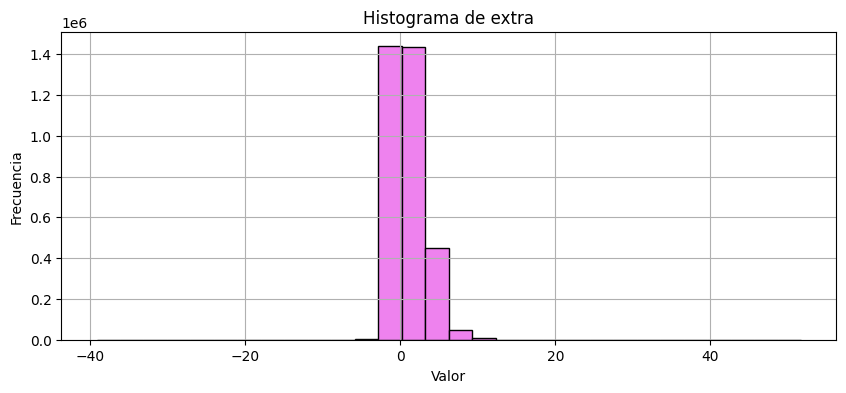

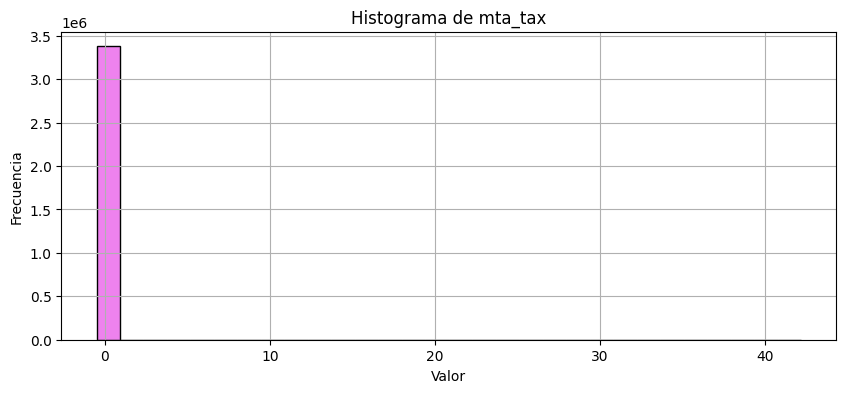

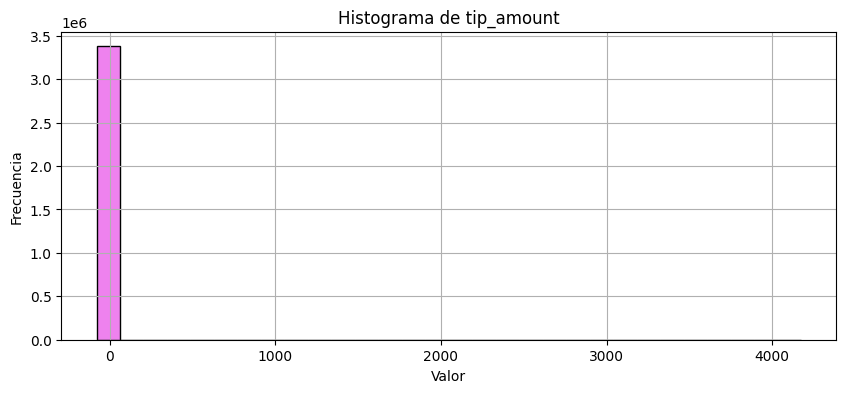

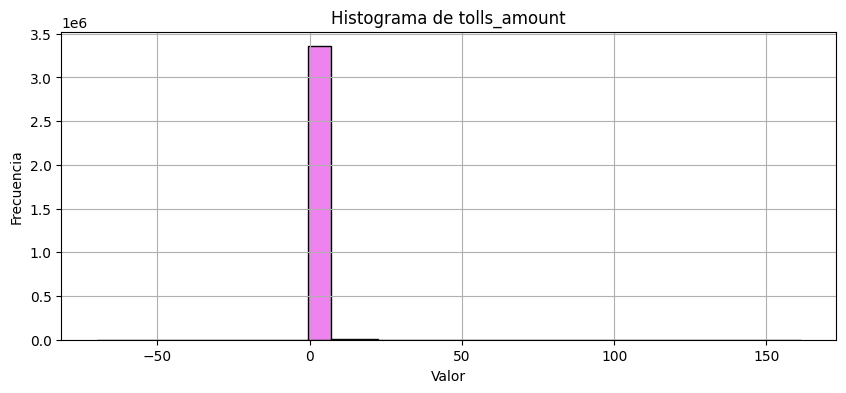

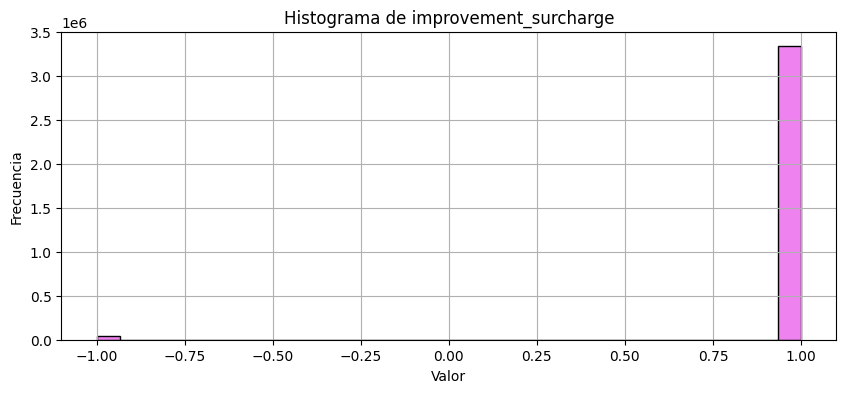

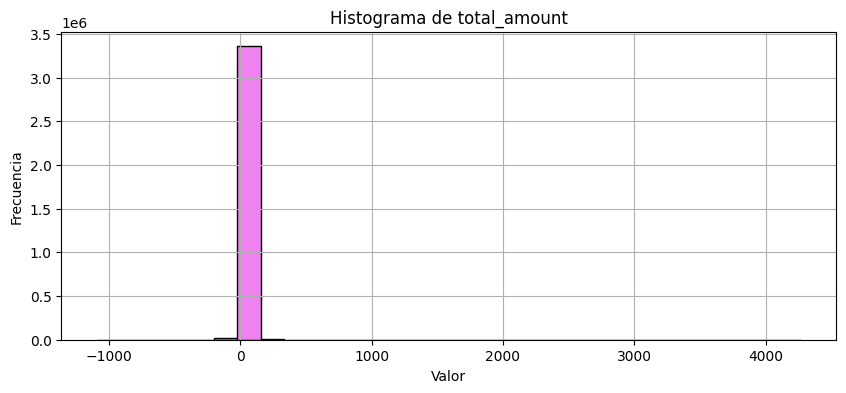

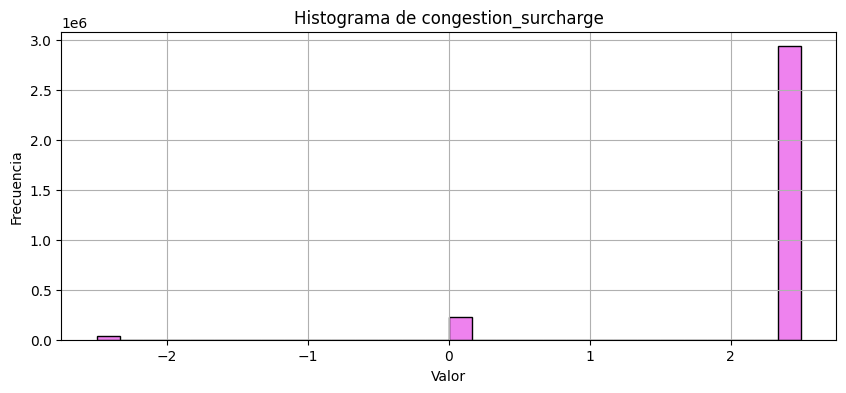

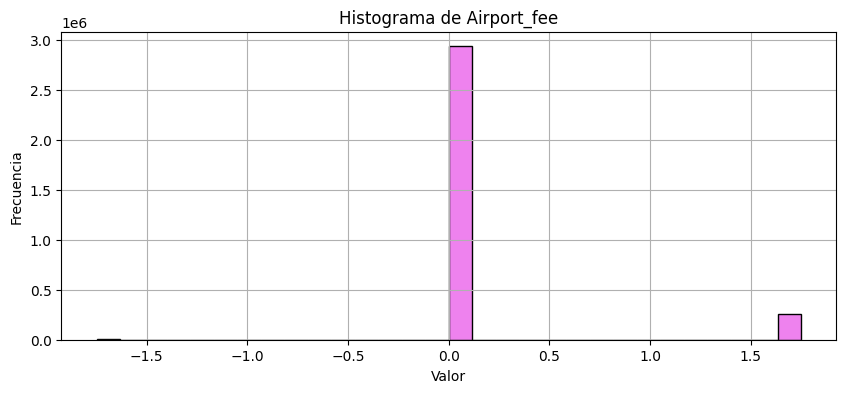

In [115]:
for column in df_Yellow_Trip_December.columns:
    if pd.api.types.is_numeric_dtype(df_Yellow_Trip_December[column]):
        plt.figure(figsize=(10, 4))
        plt.hist(df_Yellow_Trip_December[column].dropna(), bins=30, edgecolor='black', color='violet')
        plt.title(f'Histograma de {column}')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()

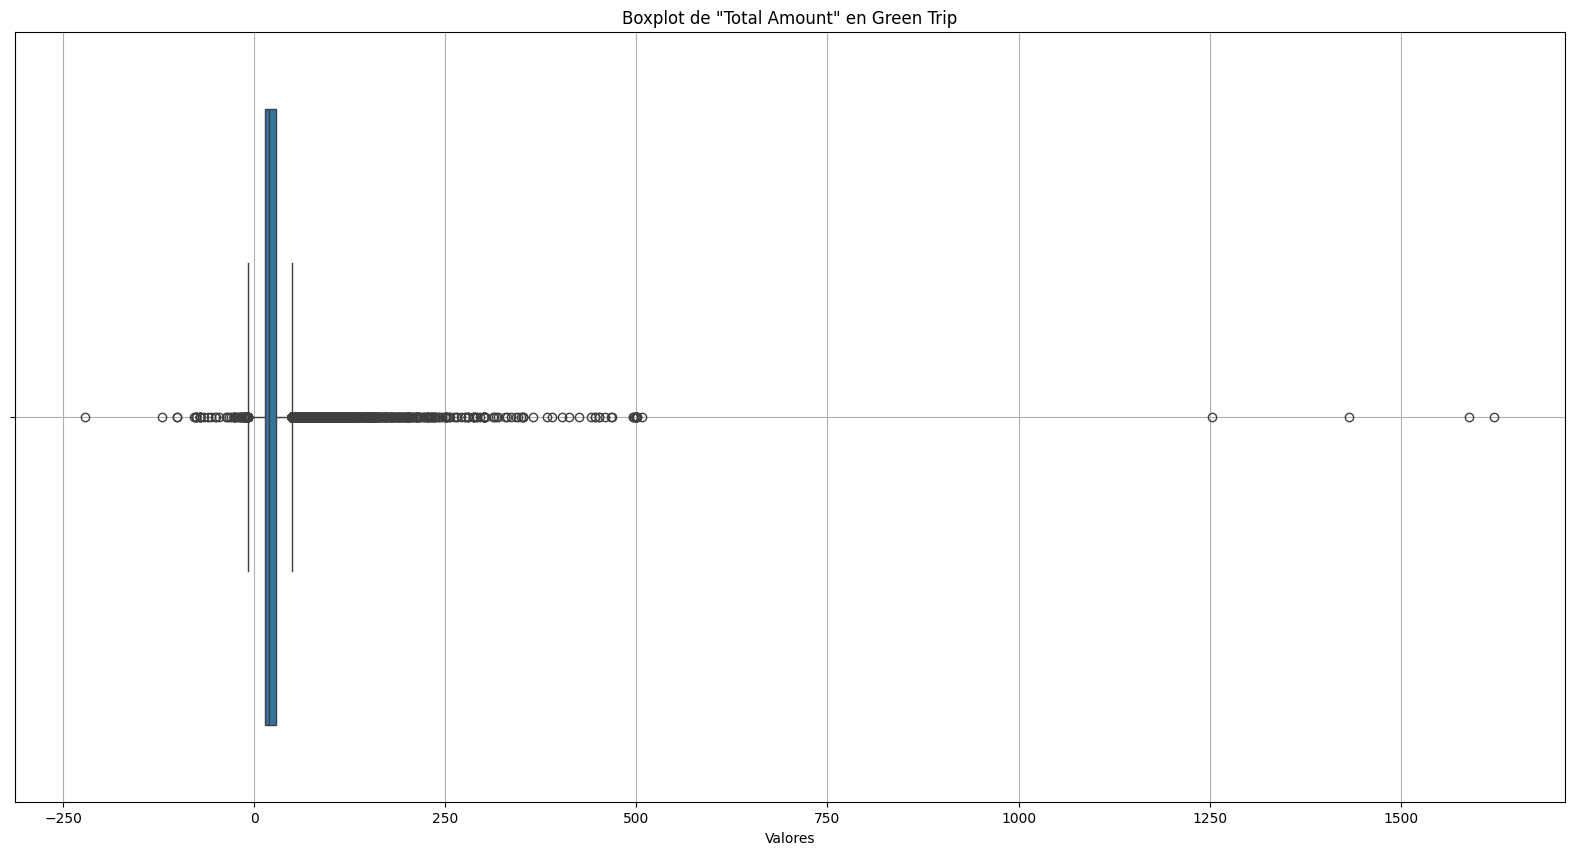

In [13]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_Green_Trip_December['total_amount'], orient="h")

plt.title('Boxplot de "Total Amount" en Green Trip')
plt.xlabel('Valores')
plt.grid(True)
plt.show()

# Normalizamos Nombres de Columnas

In [116]:
dfs = [df_Green_Trip_December, df_Green_Trip_November, df_Yellow_Trip_December, df_Yellow_Trip_November]
dfs[2].columns = dfs[3].columns = ['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'
]

## Preprocesamiento de Datos

In [118]:
def limpieza_datos(df):
    df['VendorID'] = df['VendorID'].astype(str)
    df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
    df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

    etiquetas = ['N', 'Y', 'n', 'y', 'ys', 'ye', 'no', 'yes']
    mapeo = {'N': 0, 'Y': 1, 'n': 0, 'y': 1, 'no': 0, 'yes': 1, 'ye': 1, 'ys': 1}
    df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(lambda x: mapeo[x] if x in etiquetas else None)
    df = df.dropna(subset=['store_and_fwd_flag'])

    columnas_id = [
        'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID', 
        'passenger_count', 'payment_type', 'trip_type'
    ]
    for col in columnas_id:
        try:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(-1).astype(int)
        except Exception as e:
            print(f"Error al procesar la columna {col}: {e}")

    #Listas de tuplas con las columnas con valores negativos o nulos
    condiciones = [
        ('trip_distance', 0),
        ('fare_amount', 0),
        ('total_amount', 0),
        ('passenger_count', 0),
        ('tip_amount', 0)
    ]

    for columna, valor_minimo in condiciones:
        df = df[df[columna] > valor_minimo]

    #Listas de tuplas con las columnas con valores negativos o nulos
    condiciones_2 = [
        ('congestion_surcharge', 0),
        ('improvement_surcharge', 0),
        ('tolls_amount', 0),
        ('tip_amount', 0),
        ('extra', 0),
        ('mta_tax', 0)
    ]

    for columna_2, valor_minimo_2 in condiciones_2:
        df = df[df[columna_2] > valor_minimo_2]

    try:
        df['ehail_fee'] = df['ehail_fee'].replace('None', 0).astype(float)
    except Exception as e:
        print(f"Se omiten las columnas: {e}")

    #Se eliminan filas duplicadas
    df = df.drop_duplicates()

    #Eliminamos las filas con el mismo tiempo de recogida y entrega
    df = df[df['lpep_pickup_datetime'] != df['lpep_dropoff_datetime']]

    return df

## Merge Datasets de Taxi y Rutas de los Taxis

In [ ]:
df_map_taxi_lookup

In [ ]:
df_taxi_zone_shp

In [ ]:
df_taxi_zone_shp.columns

In [24]:
def merge_taxi_with_zones(taxi_df, zones_df):
    #Se fusionan el dataFrame de taxis con el DataFrame de zonas basado en la columna de ID de ubicación de recogida
    merged_df = pd.merge(taxi_df, zones_df, left_on='PULocationID', right_on='LocationID')
    merged_df = merged_df.drop(columns='LocationID')
    merged_df = merged_df.rename(columns={'Borough': 'PU_borough', 'Zone': 'PU_zone', 'service_zone': 'PU_service_zone'})

    #Repetir el proceso para la ubicación de entrega
    merged_df = pd.merge(merged_df, zones_df, left_on='DOLocationID', right_on='LocationID')
    merged_df = merged_df.drop(columns='LocationID')
    merged_df = merged_df.rename(columns={'Borough': 'DO_borough', 'Zone': 'DO_zone', 'service_zone': 'DO_service_zone'})

    return merged_df

## **Plot Zonas de Recogida**

In [25]:
def plot_pickup_zones(df):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.scatter(df['pickup_longitude'], df['pickup_latitude'], s=0.1)
    ax1.set_title('Zonas de Recogida')
    ax1.set_xlabel('Longitud')
    ax1.set_ylabel('Latitud')
    ax2.scatter(df['dropoff_longitude'], df['dropoff_latitude'], s=0.1)
    ax2.set_title('Zonas de Llegada')
    ax2.set_xlabel('Longitud')
    ax2.set_ylabel('Latitud')

    plt.show()

In [26]:
zones_df = {
    'Green_Trip_December' : limpieza_datos(merge_taxi_with_zones(dfs[0], df_taxi_zone_shp)),
    'Green_Trip_November' : limpieza_datos(merge_taxi_with_zones(dfs[1], df_taxi_zone_shp)),
    'Yellow_Trip_December' : limpieza_datos(merge_taxi_with_zones(dfs[2], df_taxi_zone_shp)),
    'Yellow_Trip_November' : limpieza_datos(merge_taxi_with_zones(dfs[3], df_taxi_zone_shp))
}

zones_df['Green_Trip_December']['origin']  = 'Green_Trip_December'
zones_df['Green_Trip_November']['origin']  = 'Green_Trip_November'
zones_df['Yellow_Trip_December']['origin'] = 'Yellow_Trip_December'
zones_df['Yellow_Trip_November']['origin'] = 'Yellow_Trip_November'

merged_df = pd.concat([
    zones_df['Green_Trip_December'],
    zones_df['Green_Trip_November'],
    zones_df['Yellow_Trip_December'],
    zones_df['Yellow_Trip_November']
])

merged_df

Error al procesar la columna trip_type: 'trip_type'
Se omiten las columnas: 'ehail_fee'
Error al procesar la columna trip_type: 'trip_type'
Se omiten las columnas: 'ehail_fee'


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,borough_x,geometry_x,OBJECTID_y,Shape_Leng_y,Shape_Area_y,zone_y,borough_y,geometry_y,origin,airport_fee
685,1,2023-12-01 12:05:53,2023-12-01 12:40:30,0,1,95,107,1,9.30,44.3,...,Queens,"POLYGON ((1026559.225 208467.841, 1026590.157 ...",107,0.038041,0.000075,Gramercy,Manhattan,"POLYGON ((989131.643 205749.904, 989084.531 20...",Green_Trip_December,NaN
2342,2,2023-12-02 00:30:53,2023-12-02 00:54:13,0,1,255,161,3,4.71,26.1,...,Brooklyn,"POLYGON ((994849.011 203499.267, 994911.093 20...",161,0.035804,0.000072,Midtown Center,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",Green_Trip_December,NaN
4141,2,2023-12-02 23:32:59,2023-12-03 00:02:38,0,1,83,239,1,10.15,44.3,...,Queens,"POLYGON ((1014422.557 210792.836, 1014532.616 ...",239,0.063626,0.000205,Upper West Side South,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22...",Green_Trip_December,NaN
4221,2,2023-12-03 00:03:21,2023-12-03 00:25:21,0,1,75,95,1,11.06,43.6,...,Manhattan,"POLYGON ((1000577.175 228028.553, 1001238.138 ...",95,0.113630,0.000573,Forest Hills,Queens,"POLYGON ((1026559.225 208467.841, 1026590.157 ...",Green_Trip_December,NaN
4247,2,2023-12-03 00:45:19,2023-12-03 01:07:19,0,1,95,137,1,10.85,43.6,...,Queens,"POLYGON ((1026559.225 208467.841, 1026590.157 ...",137,0.046108,0.000116,Kips Bay,Manhattan,"POLYGON ((991954.728 209026.462, 991949.076 20...",Green_Trip_December,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158969,2,2023-11-30 23:09:19,2023-11-30 23:30:48,0,1,138,237,3,10.55,41.5,...,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",237,0.042213,0.000096,Upper East Side South,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",Yellow_Trip_November,1.75
3159009,2,2023-11-30 23:21:04,2023-11-30 23:42:09,0,1,164,255,1,6.11,28.9,...,Manhattan,"POLYGON ((988787.425 210315.593, 988662.868 21...",255,0.062384,0.000172,Williamsburg (North Side),Brooklyn,"POLYGON ((994849.011 203499.267, 994911.093 20...",Yellow_Trip_November,0.00
3159030,2,2023-11-30 23:02:39,2023-11-30 23:20:22,0,1,138,263,1,8.38,33.8,...,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",263,0.037017,0.000066,Yorkville West,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",Yellow_Trip_November,1.75
3159033,1,2023-11-30 23:23:41,2023-11-30 23:49:20,0,1,138,239,1,9.80,38.7,...,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",239,0.063626,0.000205,Upper West Side South,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22...",Yellow_Trip_November,1.75


In [ ]:
print(merged_df)

In [27]:
#Revisar Renombramiento de columnas
cols_zonas = ['borough_x', 'zone_x']
pickups_by_zone = merged_df.groupby(['origin', *cols_zonas]).size().reset_index(name='count')
pickups_by_zone = pickups_by_zone.sort_values(['origin', 'count'], ascending=[True, False]).groupby('origin').head(10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


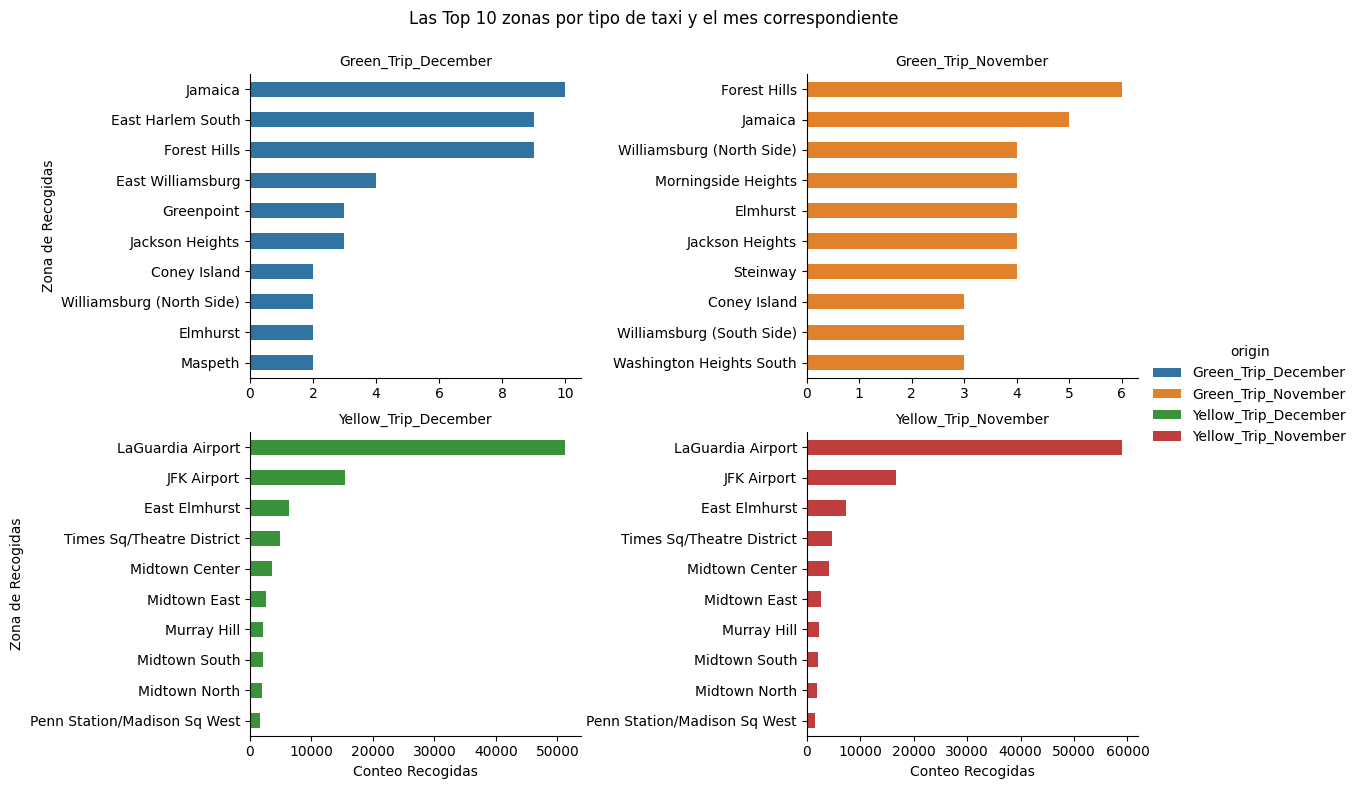

In [28]:
#nuevo_color = sns.color_palette("Set2")
fig = sns.catplot(
    x='count',
    y='zone_x',
    hue='origin',
    col='origin',
    col_wrap=2,
    data=pickups_by_zone,
    kind='bar',
    height=4,
    aspect=1.5,
    sharex=False,
    sharey=False,
    width=0.5
)


fig.fig.subplots_adjust(top=0.9)
fig.fig.suptitle('Las Top 10 zonas por tipo de taxi y el mes correspondiente')
fig.set_axis_labels('Conteo Recogidas', 'Zona de Recogidas')
fig.set_titles('{col_name}')

#Eliminar las leyendas duplicadas
for ax in fig.axes.flat:
    ax.legend().remove()

In [29]:
zones_shape = pd.merge(merged_df, df_taxi_zone_shp, left_on='PULocationID', right_on='LocationID')
zones_shape = gpd.GeoDataFrame(zones_shape, geometry=zones_shape.geometry)

In [ ]:
zones_shape

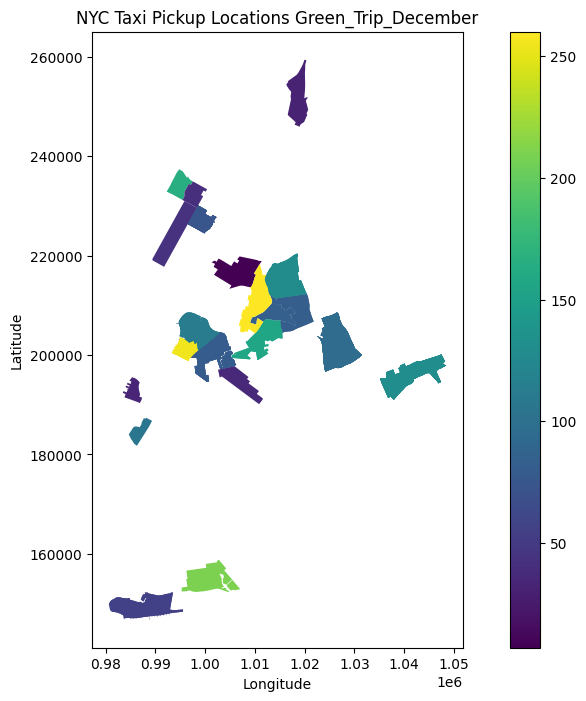

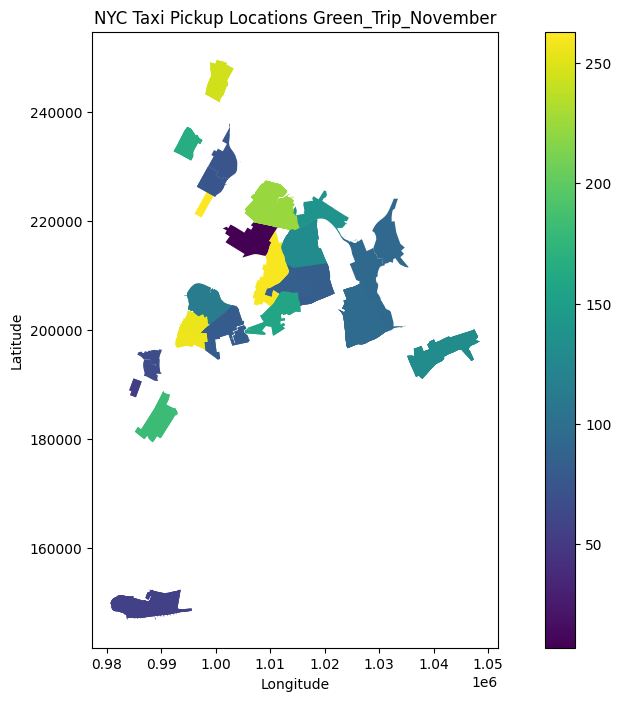

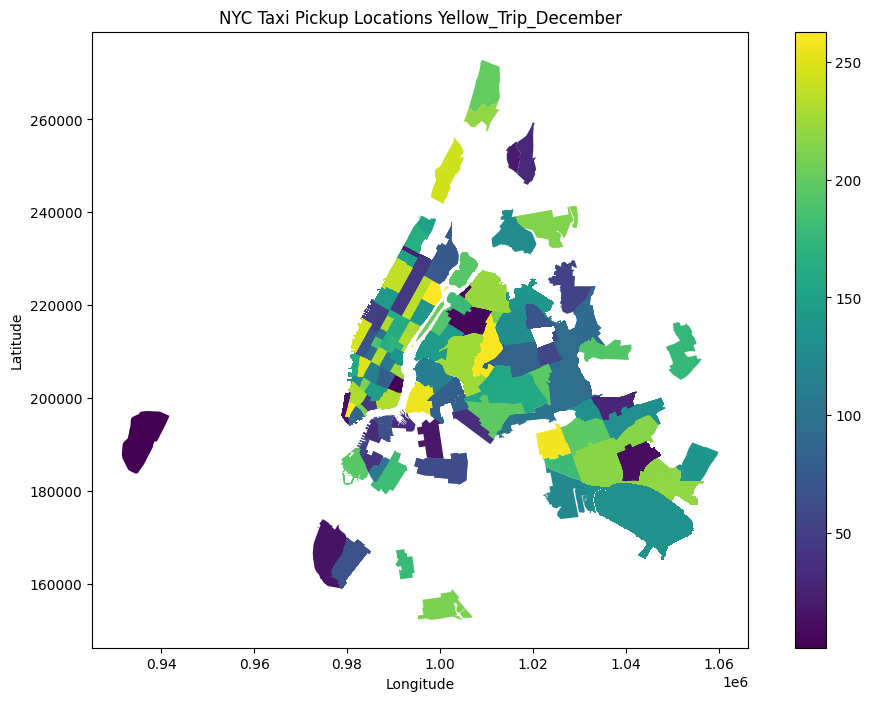

In [30]:
def plot_heatmap_por_origen(gdf, origin, column="PULocationID", title_prefix="NYC Taxi Pickup Locations", cmap="viridis"):
    filtered_gdf = gdf[gdf['origin'] == origin]
    fig, ax = plt.subplots(figsize=(12, 8))
    filtered_gdf.plot(column=column, cmap=cmap, ax=ax, legend=True)
    ax.set_title(f"{title_prefix} {origin}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.show()

plot_heatmap_por_origen(zones_shape, 'Green_Trip_December', "PULocationID", "NYC Taxi Pickup Locations")
plot_heatmap_por_origen(zones_shape, 'Green_Trip_November', "PULocationID", "NYC Taxi Pickup Locations")
plot_heatmap_por_origen(zones_shape, 'Yellow_Trip_December', "PULocationID", "NYC Taxi Pickup Locations")

**2.2 ¿Cuál es el trayecto en el que la relación precio/km es más baja? ¿Cuál es el trayecto en el que la relación tiempo/km es más baja? ¿Cuál es el trayecto en el que la relación precio/tiempo es más baja?**

In [ ]:
zones_shape.columns

In [31]:
#Creamos una función donde se calcule la tarifa más alta por kilómetro para cada viaje.
def tarifa_por_viaje(gdf):
  resultado = (
      gdf.assign(fare_per_km = lambda x: x['fare_amount'] / x['trip_distance']).loc[lambda x: x['fare_per_km'].idxmax()]
  )
  print('El trayecto en el que la relación precio/km más alta es:')
  print(f"Empieza en: {resultado['zone_x']} y finaliza en:  {resultado['zone_y']}")
  return resultado[
      ['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
        'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
        'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
        'tip_amount']
  ]

tarifa_viaje_km_mas_baja = tarifa_por_viaje(zones_shape)
tarifa_viaje_km_mas_baja

El trayecto en el que la relación precio/km más alta es:
Empieza en: Midtown North y finaliza en:  Midtown North


VendorID                                   2
lpep_pickup_datetime     2023-12-01 18:40:27
lpep_dropoff_datetime    2023-12-01 18:40:37
store_and_fwd_flag                         0
RatecodeID                                 2
PULocationID                             163
DOLocationID                             163
passenger_count                            1
trip_distance                           0.01
fare_amount                             70.0
extra                                    5.0
mta_tax                                  0.5
tip_amount                             17.19
Name: 3994, dtype: object

In [32]:
def calcular_tiempo_por_km(dtf):
  dtf = dtf.assign(
      lpep_pickup_datetime=lambda x: pd.to_datetime(x['lpep_pickup_datetime']),
      lpep_dropoff_datetime=lambda x: pd.to_datetime(x['lpep_dropoff_datetime']),
      trip_time_in_secs=lambda x: (x['lpep_dropoff_datetime'] - x['lpep_pickup_datetime']).dt.total_seconds(), time_per_km=lambda x: x['trip_time_in_secs'] / x['trip_distance']
  )

  tarifa_tiempo_mas_baja_viaje = dtf.loc[dtf['time_per_km'].idxmin()]
  print('El trayecto en el que la relación tiempo/km es mas baja es:')
  print(f"Desde {tarifa_tiempo_mas_baja_viaje['zone_x']} a {tarifa_tiempo_mas_baja_viaje['zone_y']}")

  return tarifa_tiempo_mas_baja_viaje[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
                                    'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
                                    'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
                                    'tip_amount']]

resultado_tiempo_mas_bajo = calcular_tiempo_por_km(zones_shape)
resultado_tiempo_mas_bajo

El trayecto en el que la relación tiempo/km es mas baja es:
Desde Meatpacking/West Village West a East Village


VendorID                                   2
lpep_pickup_datetime     2023-11-05 01:55:10
lpep_dropoff_datetime    2023-11-05 01:11:06
store_and_fwd_flag                         0
RatecodeID                                 1
PULocationID                             158
DOLocationID                              79
passenger_count                            1
trip_distance                           2.03
fare_amount                             15.6
extra                                    1.0
mta_tax                                  0.5
tip_amount                              4.52
Name: 131933, dtype: object

In [33]:
def calcular_tarifa_por_tiempo(dtf):
    dtf['lpep_pickup_datetime'] = pd.to_datetime(dtf['lpep_pickup_datetime'])
    dtf['lpep_dropoff_datetime'] = pd.to_datetime(dtf['lpep_dropoff_datetime'])
    dtf['trip_time_in_secs'] = (dtf['lpep_dropoff_datetime'] - dtf['lpep_pickup_datetime']).dt.total_seconds()
    dtf['fare_per_time'] = dtf['fare_amount'] / dtf['trip_time_in_secs']

    tarifa_mas_baja_viaje = dtf.loc[dtf['fare_per_time'].idxmin()]
    print('El trayecto con la relación precio/tiempo más baja es:')
    print(f"Empieza en: {tarifa_mas_baja_viaje['zone_x']} y finaliza en: {tarifa_mas_baja_viaje['zone_y']}")

    return tarifa_mas_baja_viaje[['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
                                   'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
                                   'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
                                   'tip_amount']]

resultado_tarifa_mas_baja_tiempo = calcular_tarifa_por_tiempo(zones_shape)
resultado_tarifa_mas_baja_tiempo

El trayecto con la relación precio/tiempo más baja es:
Empieza en: West Chelsea/Hudson Yards y finaliza en: Forest Hills


VendorID                                   2
lpep_pickup_datetime     2023-11-05 01:45:37
lpep_dropoff_datetime    2023-11-05 01:30:01
store_and_fwd_flag                         0
RatecodeID                                 1
PULocationID                             246
DOLocationID                              95
passenger_count                            1
trip_distance                          12.79
fare_amount                             56.9
extra                                    1.0
mta_tax                                  0.5
tip_amount                             13.77
Name: 131934, dtype: object

**2.3 Muestra la evolución del tiempo medio de trayecto a lo largo del día. Muestra la evolución de la distancia media de trayecto a lo largo del día**

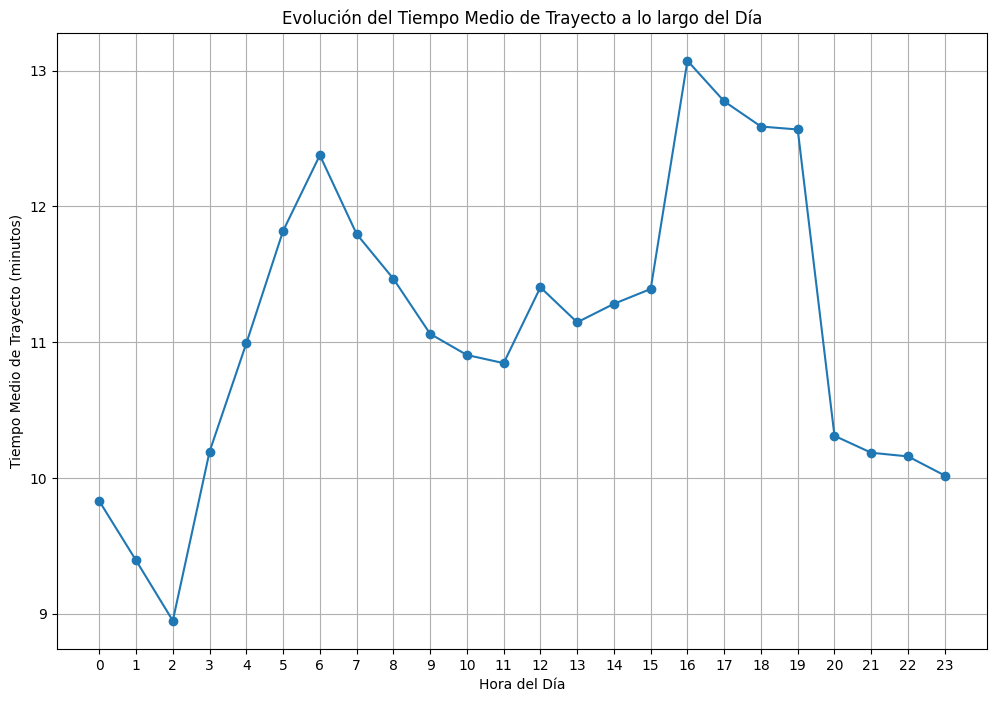

In [34]:
def evolucion_tiempo_trayecto(T_df):
    T_df['lpep_pickup_datetime'] = pd.to_datetime(T_df['lpep_pickup_datetime']).dt.hour
    media_tiempo_viaje = T_df.groupby('lpep_pickup_datetime')['trip_time_in_secs'].mean() / 60
    media_distancia_viaje = T_df.groupby('lpep_pickup_datetime')['trip_distance'].mean()
    return media_tiempo_viaje, media_distancia_viaje

media_t_viaje, media_dist_viaje = evolucion_tiempo_trayecto(zones_shape)

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(media_t_viaje.index, media_dist_viaje.values, marker='o', linestyle='-')
plt.title('Evolución del Tiempo Medio de Trayecto a lo largo del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Tiempo Medio de Trayecto (minutos)')
plt.grid(True)
plt.xticks(range(24))
plt.show()

**2.4 Elige dos zonas cualquiera de la ciudad y calcula la probabilidad de desplazarse de una zona a otra en menos de X minutos. (El valor X así como las zonas deben ser fácilmente modificables).**

In [35]:
def probabilidad_zonas(dfx, X, zona_recogida, zona_destino):
    viajes = dfx[(dfx['zone_x'] == zona_recogida) & (dfx['zone_y'] == zona_destino)]
    viajes['tiempo_viaje_minutos'] = viajes['trip_time_in_secs'] / 60
    probabilidad = (viajes['tiempo_viaje_minutos'] < X).mean()
    return probabilidad

zona_recogida = 'West Chelsea/Hudson Yards'
zona_destino = 'Forest Hills'
X = 50
prob = probabilidad_zonas(zones_shape, X, zona_recogida, zona_destino)
print(f"La probabilidad de desplazarse de {zona_recogida} a {zona_destino} en menos de {X} minutos es: {prob:.2%}")


La probabilidad de desplazarse de West Chelsea/Hudson Yards a Forest Hills en menos de 50 minutos es: 91.30%


/Users/edwinlopezariaz/UNI/ANALITICA-DATOS/casos-analitica-mbd/.venv/lib/python3.11/site-packages/geopandas/geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


**2.5	Repite los apartados 1.1, 1.2, 1.3, 2.1, 2.2, 2.3 y 2.4 con un dataset del mismo mes pero del año 2009. Comenta todas las diferencias que vayas encontrando.**

In [36]:
yellow_tripdata_200912 = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2009-12.parquet"
df_Yellow_Trip_December_2009 = pd.read_parquet(yellow_tripdata_200912, engine='pyarrow')
df_Yellow_Trip_December_2009

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,VTS,2009-12-17 07:35:00,2009-12-17 07:40:00,1,0.11,-73.987928,40.737885,NaN,NaN,-73.990335,40.748450,Credit,4.9,0.0,0.5,1.0,0.0,6.4
1,VTS,2009-12-21 14:19:00,2009-12-21 14:24:00,1,1.07,-73.956008,40.779558,NaN,NaN,-73.967303,40.787833,CASH,4.9,0.0,0.5,0.0,0.0,5.4
2,VTS,2009-12-18 03:09:00,2009-12-18 03:34:00,1,8.98,-73.955745,40.689503,NaN,NaN,-73.937730,40.737463,CASH,23.7,0.5,0.5,0.0,0.0,24.7
3,VTS,2009-12-14 21:24:00,2009-12-14 21:33:00,2,1.66,-73.983985,40.754645,NaN,NaN,-73.986195,40.737610,Credit,6.9,0.5,0.5,3.0,0.0,10.9
4,VTS,2009-12-18 08:17:00,2009-12-18 08:29:00,1,1.55,-73.959132,40.769265,NaN,NaN,-73.976267,40.760615,CASH,7.7,0.0,0.5,0.0,0.0,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14583399,VTS,2009-12-26 14:06:00,2009-12-26 14:13:00,1,0.95,-73.979943,40.775545,NaN,NaN,-73.979182,40.765658,CASH,5.7,0.0,0.5,0.0,0.0,6.2
14583400,VTS,2009-12-26 21:40:00,2009-12-26 21:59:00,5,6.97,-74.017145,40.705885,NaN,NaN,-73.971427,40.782797,CASH,18.5,0.5,0.5,0.0,0.0,19.5
14583401,VTS,2009-12-05 11:13:00,2009-12-05 11:16:00,1,0.88,-73.975970,40.752222,NaN,NaN,-73.966812,40.763617,CASH,4.5,0.0,0.5,0.0,0.0,5.0
14583402,VTS,2009-12-26 18:48:00,2009-12-26 18:52:00,5,0.65,-73.955460,40.779757,NaN,NaN,-73.950940,40.775177,CASH,4.5,0.0,0.5,0.0,0.0,5.0


DATAFRAME PRUEBA

2.5	Repite los apartados 1.1, 1.2, 1.3, 2.1, 2.2, 2.3 y 2.4 con un dataset del mismo mes pero del año 2009. Comenta todas las diferencias que vayas encontrando.

- 1.1 Primer examen preliminar del dataset.  ¿En qué formato está el dataset y qué tiene que ver este formato con Big Data? ¿Qué parámetros hay en el dataset? ¿Cuál es su significado? ¿Existen valores aparentemente incorrectos?

¿En qué formato está el dataset y qué tiene que ver este formato con Big Data?
- El dataset está en formato Parquet, el cuál es un formato de almacenamiento de datos columnar que esta optimizado para Big Data. Este formato es eficiente en cuanto a espacio y permite un procesamiento más rápido para conjuntos con altos volumenes de datos. En el contexto de nuestro caso, este formato es especialmente útil para consultas analíticas en las que se deben acceder a columnas especificas en lugar de todas las filas de los datos.

¿Qué parámetros hay en el dataset? y ¿Cuál es su significado?
- VendorID: ID del proveedor del servicio de taxi.
- tpep_pickup_datetime: Fecha y hora de recogida del taxi.
- tpep_dropoff_datetime: Fecha y hora de entrega del taxi.
- passenger_count: Número de pasajeros en el taxi.
- trip_distance: Distancia del viaje en millas.
- pickup_longitude y pickup_latitude: Coordenadas de recogida.
- dropoff_longitude y dropoff_latitude: Coordenadas de entrega.
- fare_amount: Tarifa del viaje.
- total_amount: Tarifa total del viaje, incluyendo propinas y peajes.

¿Existen valores aparentemente incorrectos?

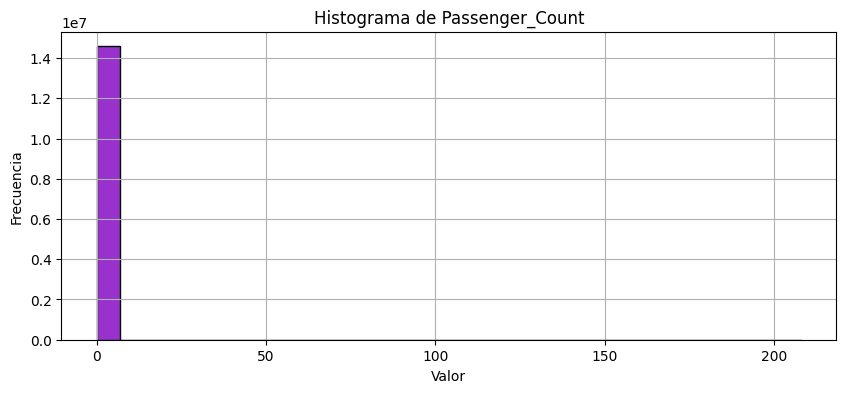

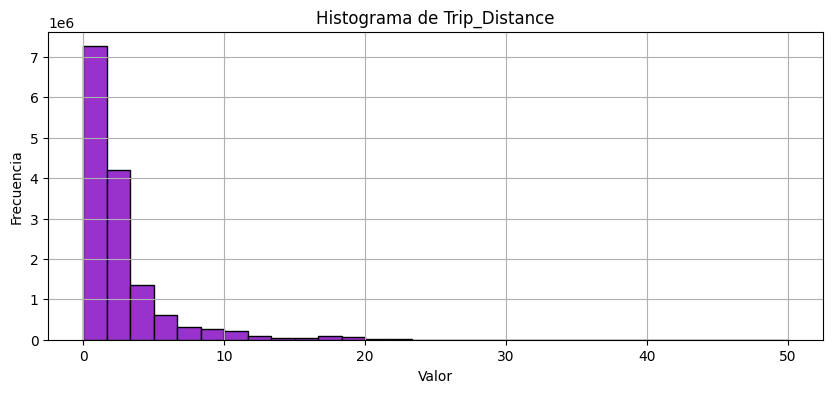

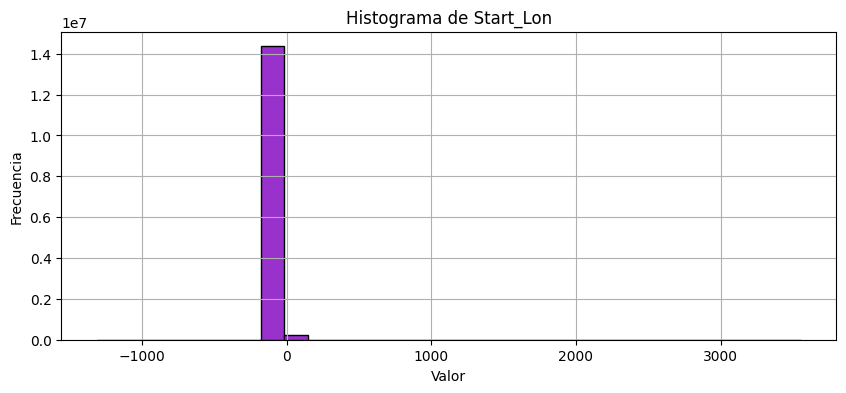

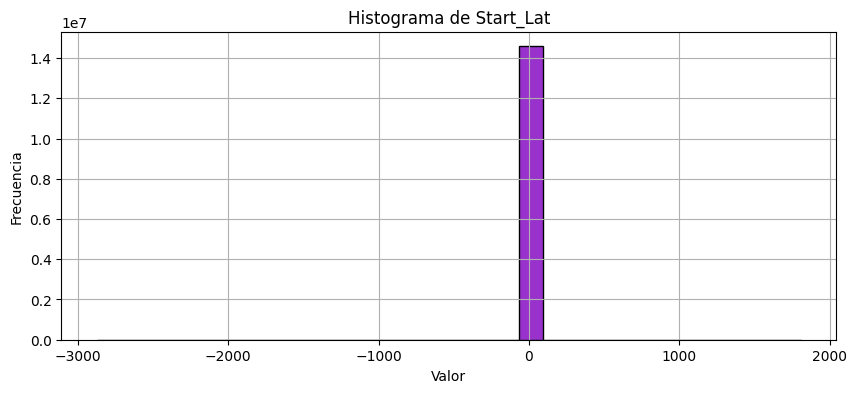

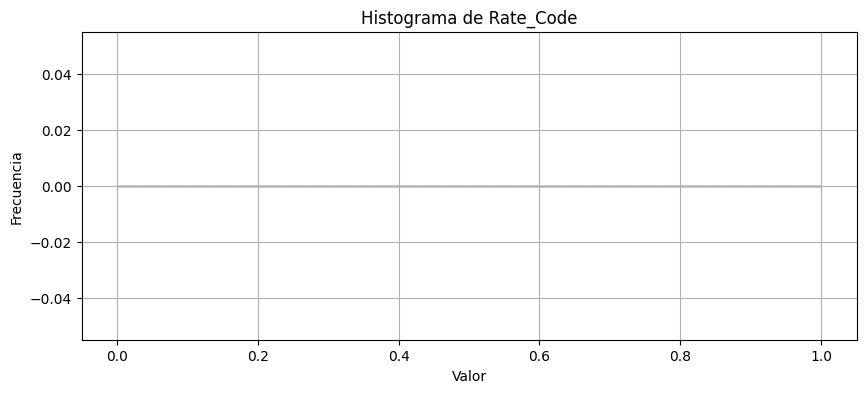

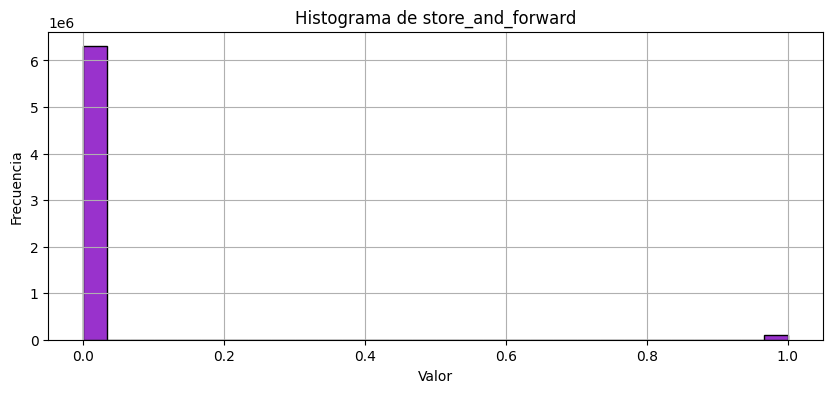

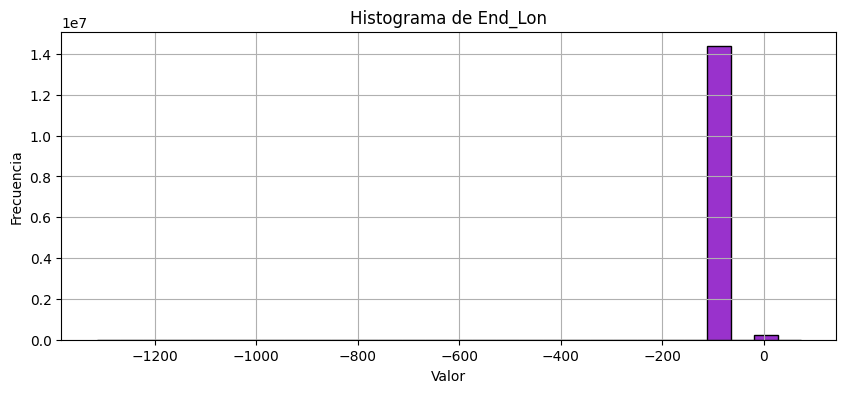

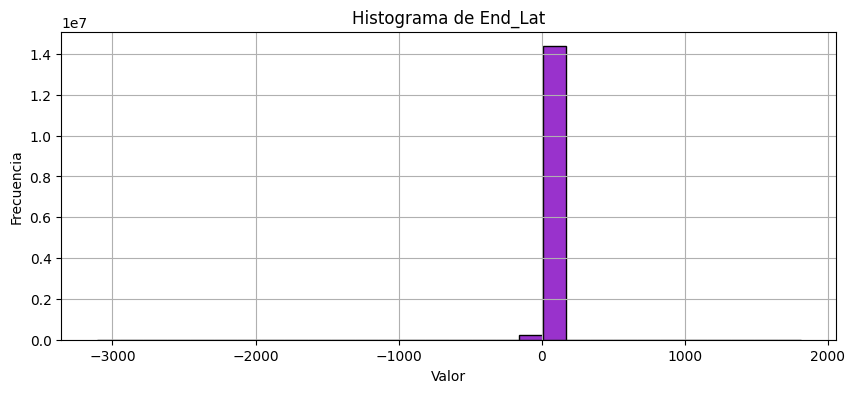

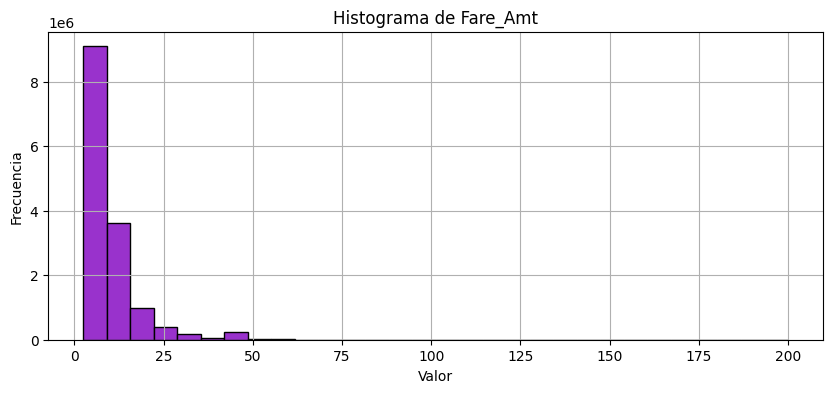

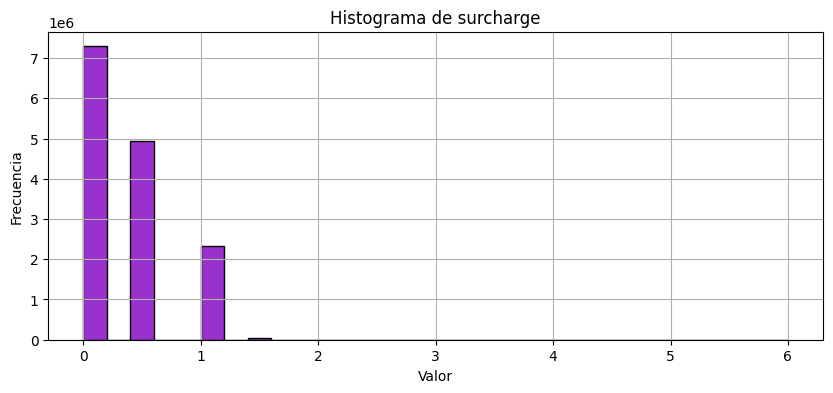

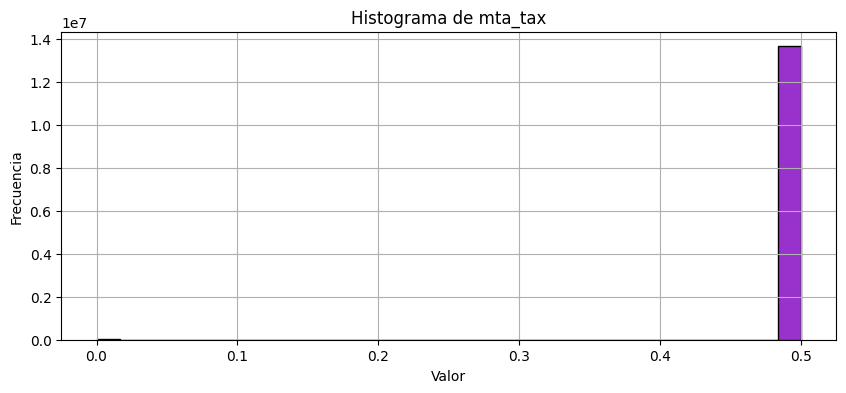

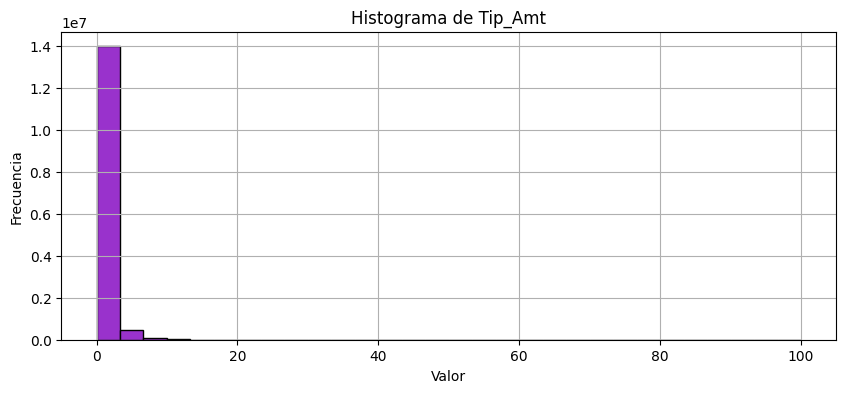

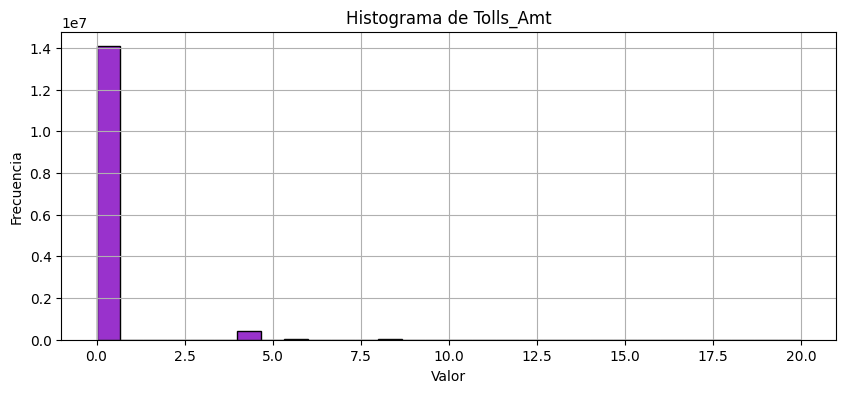

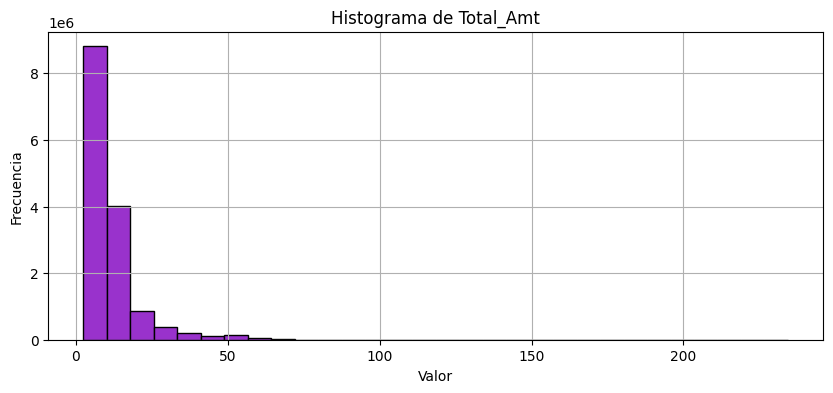

In [37]:
for column in df_Yellow_Trip_December_2009.columns:
    if pd.api.types.is_numeric_dtype(df_Yellow_Trip_December_2009[column]):
        plt.figure(figsize=(10, 4))
        plt.hist(df_Yellow_Trip_December_2009[column].dropna(), bins=30, edgecolor='black', color='darkorchid')
        plt.title(f'Histograma de {column}')
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()

In [ ]:
#Realizamos Describe del dataset para analizar posibles outliers
print(df_Yellow_Trip_December_2009.describe())

Preprocesamiento del Dataset

In [ ]:
df_Yellow_Trip_December_2009

Verificamos si las columnas del dataset del 2009 son diferentes con respecto a las columnas de los datatset mas actuales

In [38]:
#Columnas en el primer conjunto
columnas_yellow_2009 = ['vendor_name', 'Trip_Pickup_DateTime', 'Trip_Dropoff_DateTime',
              'Passenger_Count', 'Trip_Distance', 'Start_Lon', 'Start_Lat',
              'Rate_Code', 'store_and_forward', 'End_Lon', 'End_Lat', 'Payment_Type',
              'Fare_Amt', 'surcharge', 'mta_tax', 'Tip_Amt', 'Tolls_Amt',
              'Total_Amt']

#Columnas en el segundo conjunto
columnas_yellow_2022 = ['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
              'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
              'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
              'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
              'total_amount', 'congestion_surcharge', 'airport_fee']

#for columna in columnas_2:
#    if columna not in columnas_1:
#        print(columna)

Realizamos la limpieza de los datos dentro del Dataset del 2009

In [39]:
def limpieza_Datos_2009(df):
    df['vendor_name'] = df['vendor_name'].astype(str)
    df['Trip_Pickup_DateTime'] = pd.to_datetime(df['Trip_Pickup_DateTime'])
    df['Trip_Dropoff_DateTime'] = pd.to_datetime(df['Trip_Dropoff_DateTime'])
    df = df.dropna(subset=['store_and_forward'])
    df['store_and_forward'] = df['store_and_forward'].astype(int)
    columnas_ID = ['store_and_forward', 'Rate_Code', 'Passenger_Count', 'Payment_Type']
    for col in columnas_ID:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(-1).astype(int)
    condiciones = [
        ('Trip_Distance', 0),
        ('Fare_Amt', 0),
        ('Total_Amt', 0),
        ('Passenger_Count', 0),
        ('Tip_Amt', 0)
    ]
    for columna, valor_minimo in condiciones:
        df = df[df[columna] > valor_minimo]
    df = df.dropna(subset=['Start_Lon', 'Start_Lat','End_Lon','End_Lat'])
    df = df.drop_duplicates()
    df = df[df['Trip_Pickup_DateTime'] != df['Trip_Dropoff_DateTime']]
    return df

df_Yellow_Trip_December_2009_limpio = limpieza_Datos_2009(df_Yellow_Trip_December_2009)

/var/folders/fs/v56gcgbd31z4cyt1j9fvrcdr0000gq/T/ipykernel_56299/3308474933.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['store_and_forward'] = df['store_and_forward'].astype(int)
/var/folders/fs/v56gcgbd31z4cyt1j9fvrcdr0000gq/T/ipykernel_56299/3308474933.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce').fillna(-1).astype(int)
/var/folders/fs/v56gcgbd31z4cyt1j9fvrcdr0000gq/T/ipykernel_56299/3308474933.py:9: SettingWithCopyWarning: 
A value is try

Ploteamos el dataset limpio para validar que la limpieza haya quedado correcta

In [ ]:
df_Yellow_Trip_December_2009_limpio

In [ ]:
df_Yellow_Trip_December_2009_limpio.dtypes

Determinamos el polígono correspondiente a la zona del mapa con las longitudes y latitudes del dataset del 2009

In [51]:
df_subset = df_Yellow_Trip_December_2009_limpio.sample(100000)
print(df_subset)
print(df_taxi_zone_shp)
df_taxi_zone_shp

         vendor_name Trip_Pickup_DateTime Trip_Dropoff_DateTime  \
11429084         CMT  2009-12-26 19:41:48   2009-12-26 19:53:55   
13870760         CMT  2009-12-15 01:52:49   2009-12-15 02:14:05   
11859024         CMT  2009-12-29 20:26:49   2009-12-29 20:45:03   
5808315          CMT  2009-12-30 16:05:50   2009-12-30 16:15:49   
8733705          CMT  2009-12-18 14:45:39   2009-12-18 14:55:49   
...              ...                  ...                   ...   
5290929          CMT  2009-12-16 18:35:53   2009-12-16 18:47:01   
13569790         CMT  2009-12-06 14:33:51   2009-12-06 14:40:53   
4754153          CMT  2009-12-08 06:55:05   2009-12-08 06:58:18   
3134713          CMT  2009-12-12 21:23:44   2009-12-12 21:38:53   
2128661          CMT  2009-12-21 14:35:57   2009-12-21 15:04:39   

          Passenger_Count  Trip_Distance  Start_Lon  Start_Lat  Rate_Code  \
11429084                1            1.1 -73.979924  40.763475         -1   
13870760                1            8.0 

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


Realizamos un join con los dataframes de Yellow Cabs 2009 y el Zone Shape

In [44]:
df_subset['start_geometry'] = df_subset.apply(lambda row: Point(row['Start_Lon'], row['Start_Lat']), axis=1)
df_subset['end_geometry'] = df_subset.apply(lambda row: Point(row['End_Lon'], row['End_Lat']), axis=1)

print(df_subset)
#geo_df_viajes_start = gpd.GeoDataFrame(df_subset, geometry='start_geometry', crs='EPSG:4326')
#geo_df_viajes_end = gpd.GeoDataFrame(df_subset, geometry='end_geometry', crs='EPSG:4326')
#geo_df_zones = gpd.GeoDataFrame(df_zone_shapefile, geometry='geometry', crs='EPSG:4326')

#joined_df_start = gpd.sjoin(geo_df_viajes_start, geo_df_zones, how='left', op='within')
#joined_df_end = gpd.sjoin(geo_df_viajes_end, geo_df_zones, how='left', op='within')
#joined_df = joined_df_start.merge(joined_df_end, how='outer')

         vendor_name Trip_Pickup_DateTime Trip_Dropoff_DateTime  \
11811169         CMT  2009-12-02 13:45:41   2009-12-02 13:55:38   
2837813          CMT  2009-12-03 08:31:10   2009-12-03 08:50:47   
9657771          CMT  2009-12-25 09:42:27   2009-12-25 09:47:54   
4362556          CMT  2009-12-15 10:51:19   2009-12-15 11:11:50   
3840654          CMT  2009-12-18 08:39:44   2009-12-18 08:52:24   
...              ...                  ...                   ...   
11170751         CMT  2009-12-23 00:21:57   2009-12-23 00:37:00   
13208221         CMT  2009-12-31 12:40:50   2009-12-31 12:53:12   
4976857          CMT  2009-12-10 18:21:09   2009-12-10 18:41:06   
10493599         CMT  2009-12-17 17:05:01   2009-12-17 17:06:39   
13167639         CMT  2009-12-07 07:52:49   2009-12-07 07:59:52   

          Passenger_Count  Trip_Distance  Start_Lon  Start_Lat  Rate_Code  \
11811169                1            1.4 -73.975481  40.751694         -1   
2837813                 1           10.1 

In [ ]:
joined_df

In [ ]:
#joined_df.head()

In [ ]:
#plt.hexbin(joined_df['Start_Lon'], joined_df['Start_Lat'], gridsize=50, cmap='plasma')  # Cambia 'plasma' por otro mapa de color
#plt.hexbin(joined_df['End_Lon'], joined_df['End_Lat'], gridsize=50, cmap='plasma', alpha=0.5)  # Cambia 'plasma' por otro mapa de color
#plt.xlabel('Longitud')
#plt.ylabel('Latitud')
#plt.title('Heatmap de puntos de inicio y fin de viaje')
#plt.colorbar(label='Frecuencia')
#plt.show()


In [ ]:
#Ploteamos las zonas de recogida y otro con las zonas de llegada del dataset
#plt.figure(figsize=(12, 8))
#plt.scatter(df_Yellow_Trip_December_2009['Start_Lon'], df_Yellow_Trip_December_2009['Start_Lat'], alpha=0.5, label='Zonas de Recogida', c='blue')
#plt.scatter(df_Yellow_Trip_December_2009['End_Lon'], df_Yellow_Trip_December_2009['End_Lat'], alpha=0.5, label='Zonas de Llegada', c='green')
#plt.title('Zonas de Recogida y Llegada de Yellow Cabs - Diciembre 2009')
#plt.xlabel('Longitud')
#plt.ylabel('Latitud')
#plt.legend()
#plt.grid(True)
#plt.show()

In [72]:
# source: https://data.cityofnewyork.us/City-Government/Section_ZoningMapIndex/jsdz-u4b8/about_data
# download: https://data.cityofnewyork.us/resource/jsdz-u4b8.csv

# source: https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc
# download: https://data.cityofnewyork.us/api/views/755u-8jsi/rows.csv?accessType=DOWNLOAD

url_nyc_zones = "https://data.cityofnewyork.us/api/views/755u-8jsi/rows.csv?accessType=DOWNLOAD"
df_nyc_zones = pd.read_csv(url_nyc_zones)
df_nyc_zones.rename(columns={'the_geom': 'geometry'}, inplace=True)

#ax = df_zone_shapefile.plot(figsize=(50, 50), color='lightgrey', edgecolor='black')
start_gdf = gpd.GeoDataFrame(
    df_nyc_zones,
    geometry=gpd.points_from_xy(
        df_Yellow_Trip_December_2009_limpio['Start_Lon'],
        df_Yellow_Trip_December_2009_limpio['Start_Lat']
    )
)
#start_gdf.crs =  df_zone_shapefile.crs
#start_gdf.plot(ax=ax, marker='o', color='red', markersize=5)
start_gdf.plot(figsize=(50,50), alpha=0.5, cmap='Reds', legend=True, label='Zonas de Recogida')

#end_gdf = gpd.GeoDataFrame(
#    df_Yellow_Trip_December_2009_limpio,
#    geometry=gpd.points_from_xy(
#        df_Yellow_Trip_December_2009_limpio['End_Lon'],
#        df_Yellow_Trip_December_2009_limpio['End_Lat']
#    )
#)
#end_gdf.crs =  df_zone_shapefile.crs
#end_gdf.plot(ax=ax, marker='x', color='green', markersize=5)
#end_gdf.plot(ax=ax, figsize=(50,50), alpha=0.5, cmap='plasma', legend=True, label='Zonas de Llegada')

#plt.show()

ValueError: Length of values (1817222) does not match length of index (263)